# <b><div style='padding:8px;background-color:#003f88;color:white;border-radius:2px;font-size:100%;text-align: left'>Unlocking Insights to Improve E-commerce Efficiency and Customer Satisfaction</div></b>

## **Project Goal**

This project simulates a real-world business scenario where participants will analyze transactional, behavioral, and geolocation data to generate actionable insights that support strategic decision-making in areas like customer experience, sales optimization, delivery logistics, and product performance.

## **Project Objectives**

**1. Customer Insights:**
- Analyze purchasing behavior by city/state.
- Identify customer retention or churn patterns.
- Segment customers by purchase frequency and order value.
  
**2. Sales Performance Analysis:**
- Determine top-performing product categories, sellers, and regions.
- Identify trends in payment methods and revenue streams.
- Correlate lead qualification to closed deals and revenue outcomes

**3. Delivery & Logistics:**
- Compare estimated vs. actual delivery dates to measure delivery efficiency.
- Highlight cities or states with frequent delays.

**4. Review & Satisfaction Insights:**
- Analyze the distribution of review scores by product category or seller.
- Determine if longer delivery times impact review sentiment.

**5. Geospatial visualization of seller vs. customer locations to suggest delivery optimization.**
- Create a dashboard to track business KPIs using Power BI, Tableau, or Python Dash.
- Suggest A/B test opportunities from the funnel or product level.

**6. Predictive Modeling:**
- Predict order delivery delays using order, customer, and logistics data.
- Predict review scores based on order characteristics and delays.

**7. Customer Lifetime Value Prediction:**
- Estimate CLV based on historical purchase and review data.

**8. Churn Modeling:**
- Identify customers likely to churn based on order frequency and satisfaction.

**9. Lead Conversion Modeling:**
- Predict the likelihood of an MQL converting to a closed deal using behavioral and sales funnel features.

## **Dataset Overview**

The datasets provided represent a comprehensive snapshot of our e-commerce platform’s operations, from customer acquisition to post-purchase reviews. Below is a brief description of each dataset:

* **`customers`**:
  Contains information on unique customers such as `customer_id`, location (`city`, `state`), and a hashed `customer_unique_id` to track repeat buyers.

* **`geolocation`**:
  Provides latitude and longitude coordinates for zip codes across Brazil, which can be used for geographic distribution, delivery distance estimation, and regional analysis.

* **`leads_closed`**:
  Captures marketing-qualified leads (MQLs) that have successfully converted into sales. It includes `mql_id`, `won_date`, `lead_behaviour_profile`, etc.

* **`leads_qualified`**:
  Contains records of MQLs with basic lead-level metadata including `mql_id`, `landing_page_id`, `first_contact_date`, and `origin`, which help in lead source and segment performance analysis.

* **`order_items`**:
  Details individual items within each order, including `order_id`, `product_id`, `seller_id`, `price`, etc. It forms the transactional core of the sales data.

* **`order_payments`**:
  Contains payment-related data such as `order_id`, `payment_type`, `payment_installments`, and `payment_value`, allowing for analysis of customer payment behavior and preferred methods.

* **`order_reviews`**:
  Houses post-purchase customer feedback with fields such as `review_score`, `review_comment_title`, `review_comment_message`, and `review_creation_date`, essential for sentiment analysis and customer satisfaction evaluation.

* **`orders`**:
  Central dataset linking customer behavior to transaction timelines. It includes `order_status`, `purchase and delivery dates`, and ties together customer and order metadata.

* **`product_category_name_translation`**:
  Maps original product category names in Portuguese to their English equivalents for better interpretation and visualization during analysis.

* **`products`**:
  Describes each product listed on the platform with `product_id`, physical dimensions, and `product_category_name`, useful for understanding inventory and product trends.

* **`sellers`**:
  Provides seller information such as `seller_id`, location (`city`, `state`), which helps in assessing seller distribution, delivery performance, and regional seller contributions.

### **Import Libraries**

In [95]:
import os

# For data analysis
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from xgboost import XGBClassifier

# ignore warnings
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning, message="missing ScriptRunContext")

In [2]:
# List the project datasets
os.listdir(r"C:\Users\Harrison\Desktop\10ALYTICS_MONTHLY_KNOWLEDGEQUEST\datasets")

['customers.eCommerce.csv',
 'geolocation.eCommerce.csv',
 'leads_closed.eCommerce.csv',
 'leads_qualified.eCommerce.csv',
 'orders.eCommerce.csv',
 'order_items.eCommerce.csv',
 'order_payments.eCommerce.csv',
 'order_reviews.eCommerce.csv',
 'products.eCommerce.csv',
 'product_category_name_translation.eCommerce.csv',
 'sellers.eCommerce.csv']

## **Load the Datasets**

In [3]:
# Load the Datasets

customers = pd.read_csv("C:/Users/Harrison/Desktop/10ALYTICS_MONTHLY_KNOWLEDGEQUEST/datasets/customers.eCommerce.csv")
geolocation = pd.read_csv("C:/Users/Harrison/Desktop/10ALYTICS_MONTHLY_KNOWLEDGEQUEST/datasets/geolocation.eCommerce.csv")
closed_leads = pd.read_csv("C:/Users/Harrison/Desktop/10ALYTICS_MONTHLY_KNOWLEDGEQUEST/datasets/leads_closed.eCommerce.csv")
qualified_leads = pd.read_csv("C:/Users/Harrison/Desktop/10ALYTICS_MONTHLY_KNOWLEDGEQUEST/datasets/leads_qualified.eCommerce.csv")

order_items = pd.read_csv("C:/Users/Harrison/Desktop/10ALYTICS_MONTHLY_KNOWLEDGEQUEST/datasets/order_items.eCommerce.csv")
order_payments = pd.read_csv("C:/Users/Harrison/Desktop/10ALYTICS_MONTHLY_KNOWLEDGEQUEST/datasets/order_payments.eCommerce.csv")
order_reviews = pd.read_csv("C:/Users/Harrison/Desktop/10ALYTICS_MONTHLY_KNOWLEDGEQUEST/datasets/order_reviews.eCommerce.csv")
orders = pd.read_csv("C:/Users/Harrison/Desktop/10ALYTICS_MONTHLY_KNOWLEDGEQUEST/datasets/orders.eCommerce.csv")

product_cat_name = pd.read_csv("C:/Users/Harrison/Desktop/10ALYTICS_MONTHLY_KNOWLEDGEQUEST/datasets/product_category_name_translation.eCommerce.csv")
products = pd.read_csv("C:/Users/Harrison/Desktop/10ALYTICS_MONTHLY_KNOWLEDGEQUEST/datasets/products.eCommerce.csv")
sellers = pd.read_csv("C:/Users/Harrison/Desktop/10ALYTICS_MONTHLY_KNOWLEDGEQUEST/datasets/sellers.eCommerce.csv")

In [4]:
# Preview customer dataset
customers.head(4)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP


## **Data Cleaning & Preprocessing**

In the initial data cleaning phase, we will handle `missing values`, `duplicates` and `inconsistent datatype & format`.

In [5]:
# Function to check and summarize missing values across multiple datasets
def summarize_missing_values(dataframes):
    summary = {}  # Dictionary to hold missing value summaries for each dataset
    
    # Loop through each dataset tuple (name, DataFrame)
    for name, df in dataframes:
        # Count missing values for each column
        missing_values = df.isnull().sum()
        
        # Total number of rows in the dataset
        total_rows = df.shape[0]
        
        # Calculate percentage of missing values
        missing_percentage = (missing_values / total_rows) * 100
        
        # Create a DataFrame of only columns with missing values
        missing_df = pd.DataFrame({
            'missing count': missing_values,
            'missing percentage': missing_percentage
        }).query("`missing count` > 0")  # Filter only those with missing values
        
        # Store the result in the summary dictionary
        summary[name] = missing_df

    return summary


In [6]:
# Call the function with a list of (name, DataFrame) pairs
missing_summary = summarize_missing_values([
    ('customers', customers),
    ('geolocation', geolocation),
    ('closed_leads', closed_leads),
    ('qualified_leads', qualified_leads),
    ('order_items', order_items),
    ('order_payments', order_payments),
    ('order_reviews', order_reviews),
    ('orders', orders),
    ('product_cat_name', product_cat_name),
    ('products', products),
    ('sellers', sellers)
])


# Display the summary of missing values
for name, df in missing_summary.items():
    print(f'\nSummary for {name} dataset:')
    if df.empty:
        print('✔️ No missing values.')
    else:
        print(df)


Summary for customers dataset:
✔️ No missing values.

Summary for geolocation dataset:
✔️ No missing values.

Summary for closed_leads dataset:
                               missing count  missing percentage
business_segment                           1            0.118765
lead_type                                  6            0.712589
lead_behaviour_profile                   177           21.021378
has_company                              779           92.517815
has_gtin                                 778           92.399050
average_stock                            776           92.161520
business_type                             10            1.187648
declared_product_catalog_size            773           91.805226

Summary for qualified_leads dataset:
        missing count  missing percentage
origin             60                0.75

Summary for order_items dataset:
✔️ No missing values.

Summary for order_payments dataset:
✔️ No missing values.

Summary for order_reviews datase

In [7]:
# Create a copy of all the datasets
customers_clean = customers.copy()
geolocation_clean = geolocation.copy()
closed_leads_clean = closed_leads.copy()
qualified_leads_clean = qualified_leads.copy()

order_items_clean = order_items.copy()
order_payments_clean = order_payments.copy()
order_reviews_clean = order_reviews.copy()
orders_clean = orders.copy()

product_cat_name_clean = product_cat_name.copy()
products_clean = products.copy()
sellers_clean = sellers.copy()


In [8]:
# Drop rows with missing data points
closed_leads_clean = closed_leads_clean.dropna(subset = ['business_segment', 'lead_type', 'business_type'])

qualified_leads_clean = qualified_leads_clean.dropna(subset = ['origin'])

order_reviews_clean  = order_reviews_clean.dropna(subset = ['order_id', 'review_id'])

orders_clean = orders_clean.dropna(subset = ['order_approved_at', 'order_delivered_carrier_date'])

products_clean = products_clean.dropna(subset = ['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty',
                                'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'])


In [9]:
# Call the function again with list of pairs
missing_summary = summarize_missing_values([
    ('closed_leads', closed_leads_clean),
    ('qualified_leads', qualified_leads_clean),
    ('order_reviews', order_reviews_clean),
    ('orders', orders_clean),
    ('products', products_clean),
])

# Display the summary of missing values
for name, df in missing_summary.items():
    print(f'summary for {name}')
    if df.empty:
        print('✔️no missing values')
    else:
        print(f'{df}\n')

summary for closed_leads
                               missing count  missing percentage
lead_behaviour_profile                   171           20.727273
has_company                              762           92.363636
has_gtin                                 761           92.242424
average_stock                            759           92.000000
declared_product_catalog_size            756           91.636364

summary for qualified_leads
✔️no missing values
summary for order_reviews
                         missing count  missing percentage
review_score                       145            0.142261
review_comment_title             89922           88.223694
review_comment_message           60881           59.731175
review_creation_date              6530            6.406672
review_answer_timestamp           6547            6.423351

summary for orders
                               missing count  missing percentage
order_delivered_customer_date           1183            1.211544

summa

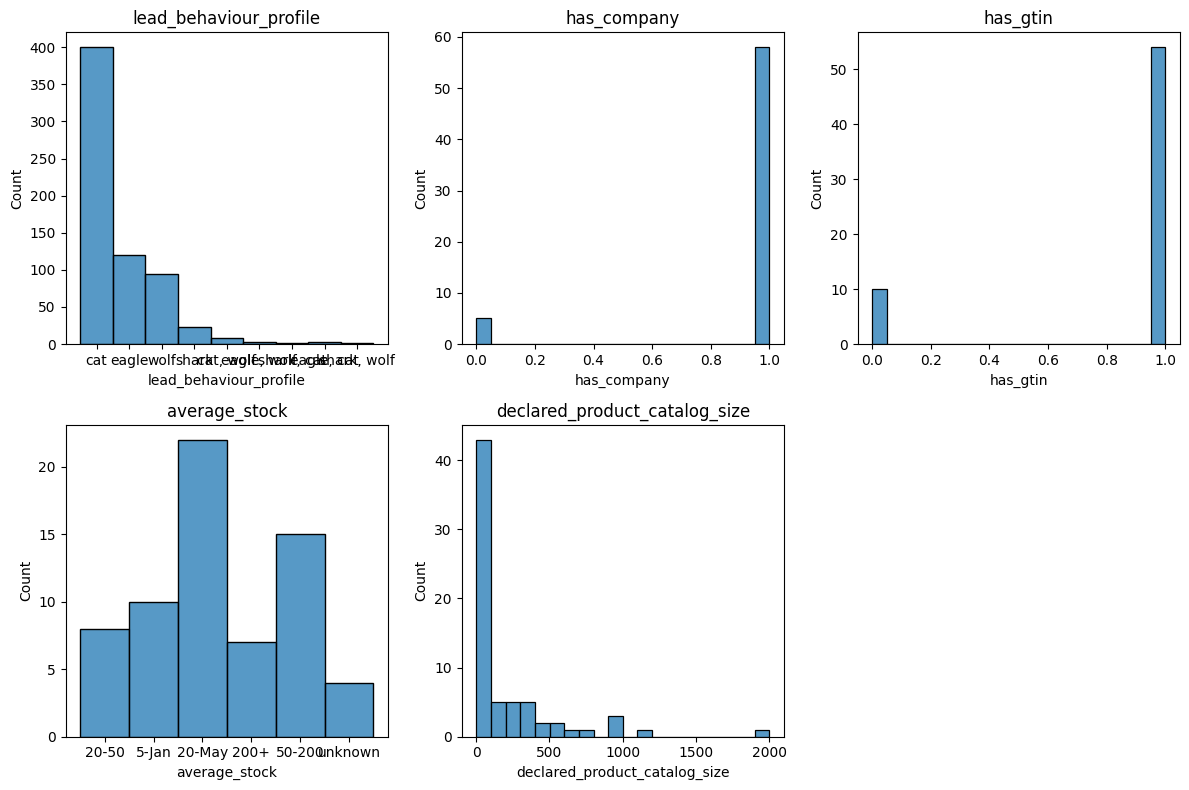

In [10]:
# Check distribution of missing values in closed_leads_clean
columns = ['lead_behaviour_profile','has_company','has_gtin','average_stock','declared_product_catalog_size']

plt.figure(figsize=(12,8))

for i, col in enumerate(columns,1):
    plt.subplot(2,3,i)
    sns.histplot(closed_leads_clean[col], bins = 20)
    plt.title(col)

plt.tight_layout()

In [11]:
# Check for unique values in 'lead_behaviour_profile
closed_leads_clean['lead_behaviour_profile'].unique()


array(['cat', 'eagle', nan, 'wolf', 'shark', 'cat, wolf', 'eagle, wolf',
       'shark, cat', 'eagle, cat', 'shark, wolf'], dtype=object)

In [12]:
# Adjust closed_leads_clean columns to contain only unique values
closed_leads_clean['lead_behaviour_profile'] = closed_leads_clean['lead_behaviour_profile'].apply(lambda x:x if x in {'cat','eagle','wolf','shark', np.nan} else np.nan)

# verify
closed_leads_clean['lead_behaviour_profile'].unique()


array(['cat', 'eagle', nan, 'wolf', 'shark'], dtype=object)

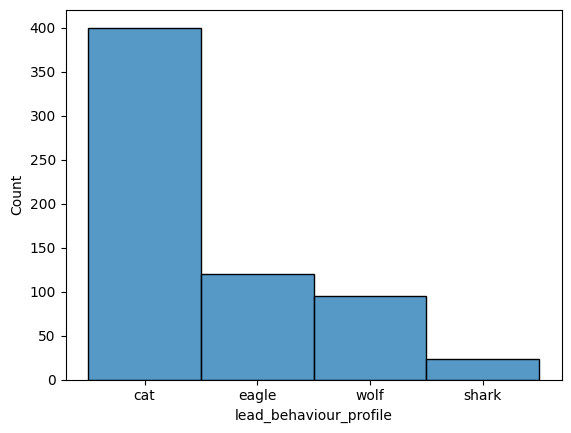

In [13]:
# visualize
sns.histplot(closed_leads_clean['lead_behaviour_profile'])
plt.show()


In [14]:
# fill the missing values with the mode
closed_leads_clean['lead_behaviour_profile'] = closed_leads_clean['lead_behaviour_profile'].fillna(closed_leads_clean['lead_behaviour_profile'].mode()[0])

# verify
closed_leads_clean['lead_behaviour_profile'].isnull().sum()

0

In [15]:
# Check for unique values in 'has_company'
closed_leads_clean['has_company'].unique()


array([nan,  1.,  0.])

In [16]:
# Drop 'has_company','has_gtin', 'average_stock','declared_product_catalog_size' as they have no relevance to our analysis

closed_leads_clean = closed_leads_clean.drop(columns = ['has_company','has_gtin', 'average_stock','declared_product_catalog_size'])

# Verify
closed_leads_clean.columns

Index(['mql_id', 'seller_id', 'sdr_id', 'sr_id', 'won_date',
       'business_segment', 'lead_type', 'lead_behaviour_profile',
       'business_type', 'declared_monthly_revenue'],
      dtype='object')

In [17]:
# Drop 'review_creation_date',review_answer_timestamp','review_comment_message', review_comment_title as they have no relevance to our analysis
order_reviews_clean = order_reviews_clean.drop(columns=['review_creation_date', 'review_answer_timestamp',
                                                        'review_comment_title', 'review_comment_message'])  

# Verify
order_reviews_clean.columns

Index(['review_id', 'order_id', 'review_score'], dtype='object')

In [18]:
# Function to summarize duplicate rows in multiple datasets
def summarize_duplicate(datasets, names):
    return pd.DataFrame([{
        'Dataset': name,
        'Total_rows': len(df),
        'Duplicate_rows': df.duplicated().sum()
    } for df, name in zip(datasets, names)])


In [19]:
summarize_duplicate(
    datasets=[
        customers_clean, geolocation_clean, closed_leads_clean, qualified_leads_clean,
        order_items_clean, order_payments_clean, order_reviews_clean, orders_clean,
        product_cat_name_clean, products_clean, sellers_clean
    ],
    names=[
        'customers', 'geolocation', 'closed_leads', 'qualified_leads',
        'order_items', 'order_payments', 'order_reviews', 'orders',
        'product_cat_name', 'products', 'sellers'
    ]
)


,Dataset,Total_rows,Duplicate_rows
0,customers,99441,0
1,geolocation,1000163,261836
2,closed_leads,825,0
3,qualified_leads,7940,0
4,order_items,112650,0
5,order_payments,103886,0
6,order_reviews,101925,30
7,orders,97644,0
8,product_cat_name,71,0
9,products,32340,0


In [20]:
# Function to Remove Duplicates
def remove_duplicates(datasets, names):
    """
    Removes duplicates from each dataset and returns a summary.
    
    Parameters:
        datasets (list of pd.DataFrame): List of cleaned DataFrames.
        names (list of str): Corresponding names of the DataFrames.

    Returns:
        pd.DataFrame: Summary showing before/after row counts and duplicates removed.
    """
    summary = []
    
    for df, name in zip(datasets, names):
        total_before = len(df)
        duplicate_count = df.duplicated().sum()
        df.drop_duplicates(inplace=True)  # Remove duplicates in-place
        total_after = len(df)

        summary.append({
            'Dataset': name,
            'Total Before': total_before,
            'Duplicates Removed': duplicate_count,
            'Total After': total_after
        })
    
    return pd.DataFrame(summary)


In [21]:
# List of datasets with duplicates
datasets = [geolocation_clean, order_reviews_clean]

# Corresponding dataset names
names = ['geolocation',  'order_reviews']

# Remove duplicates and view summary
duplicate_removal_summary = remove_duplicates(datasets, names)
print(duplicate_removal_summary)

         Dataset  Total Before  Duplicates Removed  Total After
0    geolocation       1000163              261836       738327
1  order_reviews        101925                  30       101895


In [22]:
# Change 'won_date' datatype
closed_leads_clean['won_date'] = pd.to_datetime(closed_leads_clean['won_date'])

# Change 'first_contact_date' datatype
qualified_leads_clean['first_contact_date'] = pd.to_datetime(qualified_leads_clean['first_contact_date'])

# Change 'shipping_limit_date' datatype
order_items_clean['shipping_limit_date'] = pd.to_datetime(order_items_clean['shipping_limit_date'])

# Change date datatype
orders_clean['order_purchase_timestamp'] = pd.to_datetime(orders_clean['order_purchase_timestamp'])
orders_clean['order_approved_at'] = pd.to_datetime(orders_clean['order_approved_at'])
orders_clean['order_delivered_carrier_date'] = pd.to_datetime(orders_clean['order_delivered_carrier_date'])
orders_clean['order_delivered_customer_date'] = pd.to_datetime(orders_clean['order_delivered_customer_date'])
orders_clean['order_estimated_delivery_date'] = pd.to_datetime(orders_clean['order_estimated_delivery_date'])


In [23]:
# Check the data info of order_reviews_clean
order_reviews_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101895 entries, 0 to 104718
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   review_id     101895 non-null  object
 1   order_id      101895 non-null  object
 2   review_score  101751 non-null  object
dtypes: object(3)
memory usage: 3.1+ MB


In [24]:
# Check unique values in review_score
order_reviews_clean['review_score'].unique()

array(['4', '5', '1', ..., '12/8/2017 19:07', '5/23/2018 0:51',
       '8/21/2017 15:27'], dtype=object)

`We will have to clean the review_score column to remove invalid data format`

In [25]:
# Strip whitespace and convert to numeric (invalid parsing becomes NaN)
order_reviews_clean['review_score'] = pd.to_numeric(order_reviews_clean['review_score'].astype(str).str.strip(), errors='coerce')

# Drop or filter out NaNs (these were non-numeric junk like timestamps)
order_reviews_clean = order_reviews_clean[order_reviews_clean['review_score'].notna()]

# Keep only valid scores (1 to 5)
order_reviews_clean = order_reviews_clean[order_reviews_clean['review_score'].between(1, 5)]

# Convert to integer
order_reviews_clean['review_score'] = order_reviews_clean['review_score'].astype(int)

# Check results
print("Unique review score:", order_reviews_clean['review_score'].unique())


Unique review score: [4 5 1 3 2]


In [26]:
order_reviews_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99224 entries, 0 to 104718
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review_id     99224 non-null  object
 1   order_id      99224 non-null  object
 2   review_score  99224 non-null  int32 
dtypes: int32(1), object(2)
memory usage: 2.6+ MB


In [27]:
# Verify there is no missing values
order_reviews_clean['review_score'].isnull().sum()


0

## **Exploratory Data Analysis**

Exploratory Data Analysis (EDA) is a crucial step in any data analysis project. As part of our EDA, we shall formulate key business questions behind each objectives, provide answers to them, and visualize them to gain insigths.

### 1. `Customer Insights`
- Analyze purchasing behavior by city/state.
- Identify customer retention or churn patterns
- Segment customers by purchase frequency and order value.

### Analyze purchasing behavior by city/state.
  - `How do purchasing behaviors vary by city/state?`

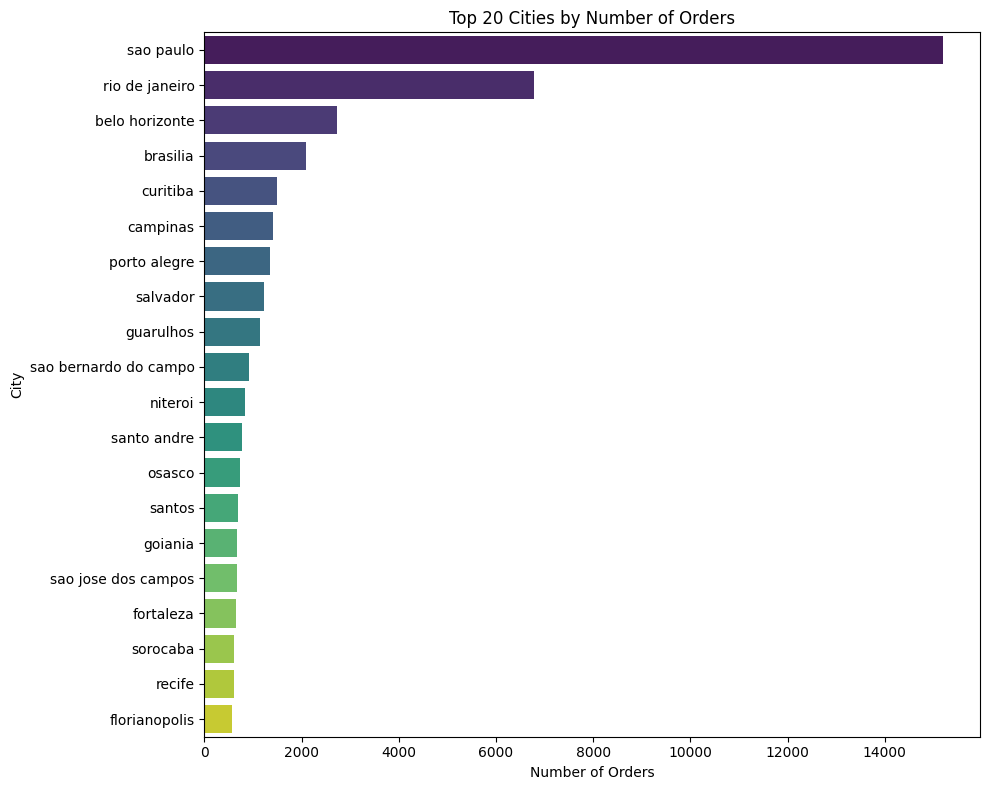

In [28]:
# Merge orders with customer info
customer_orders = pd.merge(orders_clean, customers_clean, on="customer_id", how="left")

# Group by city and state to get number of orders
purchase_behavior = (
    customer_orders.groupby(["customer_city", "customer_state"])["order_id"]
    .count()
    .reset_index()
)
purchase_behavior.columns = ["City", "State", "OrderCount"]

# ---- Top 20 Cities ----
top_cities = purchase_behavior.sort_values(by="OrderCount", ascending=False).head(20)

# Plot top 20 cities
plt.figure(figsize=(10, 8))
sns.barplot(y="City", x="OrderCount", data=top_cities, palette="viridis")
plt.title("Top 20 Cities by Number of Orders")
plt.xlabel("Number of Orders")
plt.ylabel("City")
plt.tight_layout()
plt.show()


The above bar chart presents the geographic distribution of customer orders across major cities.

**`Business Observation:`**
* `São Paulo city` is by far the dominant market, with nearly `15,000 orders`, significantly ahead of all other cities.
* `Rio de Janeiro` follows, though at a much lower volume, highlighting a steep drop after the top city.
* Other cities such as `Belo Horizonte, Brasília, Curitiba`, and `Campinas` make up the next tier, each contributing a modest but notable number of orders.
* The remaining cities in the top 20 show relatively even distribution with lower volumes.

**`Strategic Insights:`**
* `São Paulo city is a strategic hub` for customer demand and should be prioritized in terms of inventory allocation, logistics optimization, and marketing investments.
* `Rio de Janeiro and Belo Horizonte` offer opportunities for secondary focus, with potential for market penetration or customer loyalty initiatives.
* Cities like `Guarulhos, Santo André, and Osasco` — part of the São Paulo metropolitan area — further reinforce the region’s importance and may benefit from integrated regional strategies.

This distribution confirms a **high concentration of order volume in urban centers**, especially within and around São Paulo, indicating a need for **urban-centric operational planning and growth initiatives**.


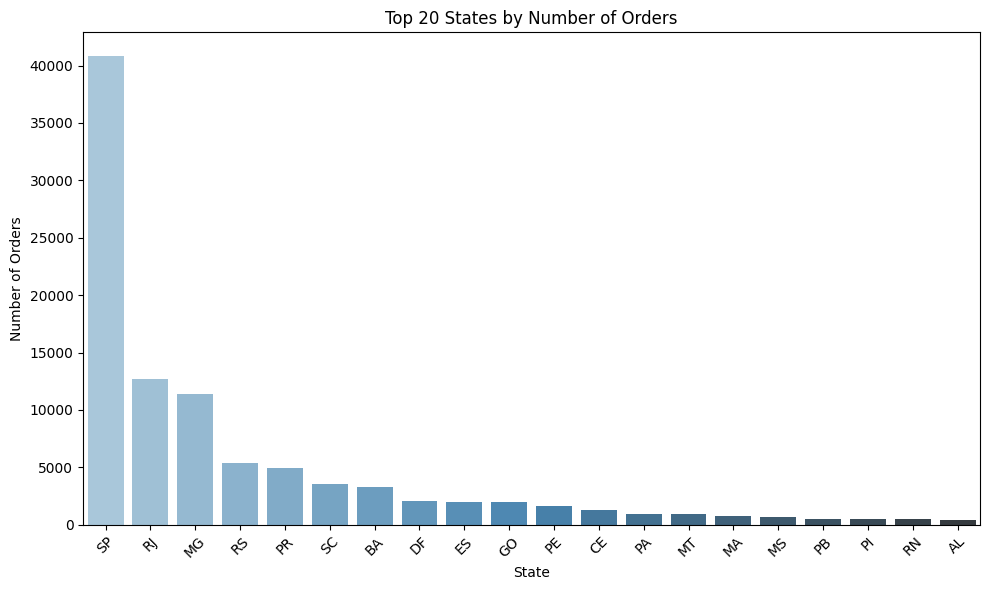

In [29]:
# ---- Top 20 States ----
state_orders = (
    purchase_behavior.groupby("State")["OrderCount"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
    .head(20)
)

plt.figure(figsize=(10, 6))
sns.barplot(x="State", y="OrderCount", data=state_orders, palette="Blues_d")
plt.title("Top 20 States by Number of Orders")
plt.xlabel("State")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Our analysis highlights significant regional disparities in customer order volume across states.

**`Business Observation:`**
* `São Paulo (SP)` is the clear leader, accounting for a `substantial majority` of orders, with over `40,000 orders`, far exceeding any other state.
* `Rio de Janeiro (RJ)` and `Minas Gerais (MG)` follow at a distant second and third, each with around `11,000–13,000 orders`.
* The remaining states contribute relatively low volumes, with a steep decline observed from fourth place onward.

**`Strategic Insights:`**
* `SP is a critical market` and should remain a focal point for logistics, marketing, and customer service efforts due to its dominant order volume.
* `Growth opportunities exist in mid-tier states` like `RJ, MG, RS, and PR`, where order volumes are significant but have room for expansion.
* `Tailored regional strategies` may be needed for lower-performing states to identify and address local market barriers or unlock potential demand.

This distribution suggests a **high concentration of business activity in a few key states**, underscoring the importance of regional prioritization in business planning.


### Identify customer retention or churn patterns.
  - `Are we retaining customers or are they churning?`

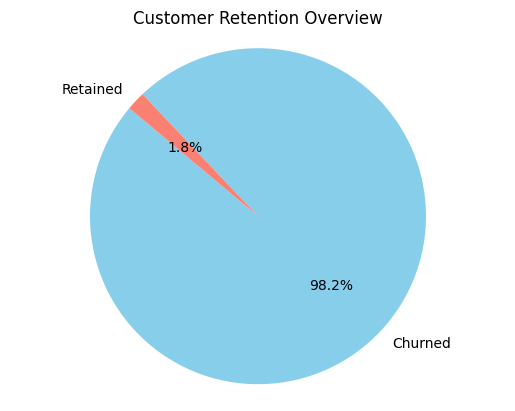

In [30]:
# merge orders_clean and order_items_clean datasets
customer_orders_merged = pd.merge(customers_clean[['customer_id', 'customer_unique_id']],
                       orders_clean[['customer_id', 'order_purchase_timestamp']],
                       on = 'customer_id')

# Convert purchase timestamp to monthly period
customer_orders_merged['order_month'] = customer_orders_merged['order_purchase_timestamp'].dt.to_period('M') 

# Count orders per unique customer per month
customer_orders = customer_orders_merged.groupby(['customer_unique_id', 'order_month']).size().reset_index(name='order_count')

# Count how many months each customer was active (i.e., made at least one order)
repeat_customers = customer_orders.groupby('customer_unique_id').size().reset_index(name='num_months')

# Classify churned and retained
churned = repeat_customers[repeat_customers['num_months'] == 1].shape[0]     # Only active in 1 month
retained = repeat_customers[repeat_customers['num_months'] > 1].shape[0]     # Active in >1 month

# Plot pie chart
labels = ['Churned', 'Retained']
sizes = [churned, retained]

plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=['skyblue', 'salmon']
)
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.title('Customer Retention Overview')
plt.show()


`The customer retention chart shows that 98.2% of customers are churned. This is due to majority of our customer making only one purchase during the observed period. This pattern may indicate a lack of repeat engagement or a limitation in the dataset's timeframe. Investigating the full lifecycle of customers or expanding the dataset's time coverage could provide deeper insights into actual retention performance.`

### Segment customers by purchase frequency and order value.
  - `How are customers segmented by purchase frequency and value?`

In [31]:
# merge orders_clean and order_items_clean datasets
segment_data = pd.merge(orders_clean[['order_id', 'customer_id', 'order_purchase_timestamp']],
                       order_items_clean[['order_id', 'price']],
                       on = 'order_id')

# merged with customer dataset to get the customer_unique_id
segment_data = segment_data.merge(customers_clean[['customer_id','customer_unique_id']], on='customer_id', how='left')

# Preview
segment_data.tail(3)

,order_id,customer_id,order_purchase_timestamp,price,customer_unique_id
111438,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:00,179.99,5097a5312c8b157bb7be58ae360ef43c
111439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:00,179.99,5097a5312c8b157bb7be58ae360ef43c
111440,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,2018-03-08 20:57:00,68.50,60350aa974b26ff12caad89e55993bd6


In [32]:
# Group by customer to get total orders and total spending
customer_metrics = segment_data.groupby('customer_unique_id').agg({
    'order_id': 'nunique',     # Number of unique orders
    'price': 'sum'             # Total money spent
}).reset_index()

# Rename columns for clarity
customer_metrics.rename(columns={
    'order_id': 'order_frequency',
    'price': 'total_value'
}, inplace=True)

# Calculate Average Order Value (AOV)
customer_metrics['avg_order_value'] = customer_metrics['total_value'] / customer_metrics['order_frequency']


In [33]:
customer_metrics.sample(2)

,customer_unique_id,order_frequency,total_value,avg_order_value
48138,821f08dc4dc701d18c04761ad21a1359,1,125.0,125.0
36643,62eb07eed03059dcb9e887e7f338dcb9,1,134.9,134.9


`Next, we’ll check the distribution of our data to enable us define bins for segmentation`

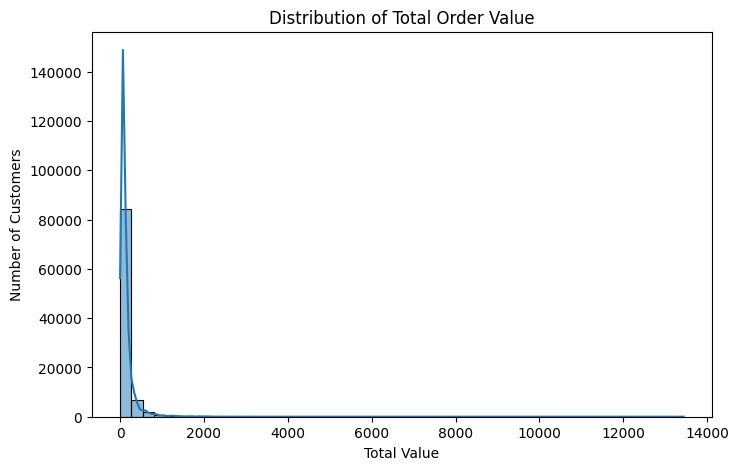

In [34]:
plt.figure(figsize=(8, 5))
sns.histplot(customer_metrics['total_value'], bins=50, kde=True)
plt.title('Distribution of Total Order Value')
plt.xlabel('Total Value')
plt.ylabel('Number of Customers')
plt.show()


`The histogram shows that the distribution of total order value is highly right-skewed. Most customers spend relatively little, while a few spend much more (the "long tail"). Hence, we will use custom bins for order_frequency and total_value, based on the observed data distribution:`

In [35]:
# Frequency bins from unique values in order frequency
freq_bins = [0, 2, 5, float('inf')]
freq_labels = ['occasional', 'regular', 'frequent']

# Total spend value bins based on the distribution of the data
value_bins = [0, 500, 1500, float('inf')]
value_labels = ['low spender', 'moderate spender', 'high spender']


In [36]:
# Frequency Segment
customer_metrics['frequency_segment'] = pd.cut(
    customer_metrics['order_frequency'],
    bins=freq_bins,
    labels=freq_labels,
    include_lowest=True
)

# Value Segment
customer_metrics['value_segment'] = pd.cut(
    customer_metrics['total_value'],
    bins=value_bins,
    labels=value_labels,
    include_lowest=True
)


In [37]:
# Combine both into a descriptive segment
customer_metrics['customer_segment'] = (
    customer_metrics['frequency_segment'].astype(str) + ' - ' +
    customer_metrics['value_segment'].astype(str)
)

# Preview the result
customer_metrics.head()


,customer_unique_id,order_frequency,total_value,avg_order_value,frequency_segment,value_segment,customer_segment
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,129.90,occasional,low spender,occasional - low spender
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,18.90,occasional,low spender,occasional - low spender
2,0000f46a3911fa3c0805444483337064,1,69.00,69.00,occasional,low spender,occasional - low spender
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,25.99,occasional,low spender,occasional - low spender
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,180.00,occasional,low spender,occasional - low spender


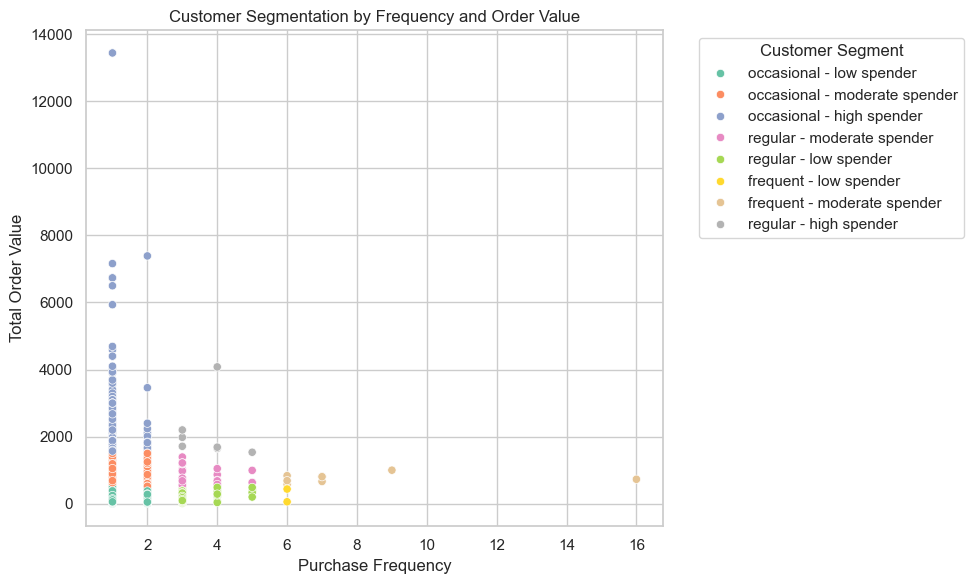

In [38]:
# Plot the segmentation using a scatterplot
sns.set(style="whitegrid")  # optional styling
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=customer_metrics, 
    x='order_frequency', 
    y='total_value', 
    hue='customer_segment',
    palette='Set2'  
)
plt.title('Customer Segmentation by Frequency and Order Value')
plt.xlabel('Purchase Frequency')
plt.ylabel('Total Order Value')
plt.legend(title='Customer Segment', bbox_to_anchor=(1.05, 1), loc='upper left')  # legend outside
plt.tight_layout()
plt.show()


#### **Key Insights from the scatterplot:**

1. **High Spending from Low-Frequency Customers**
   A significant number of `occasional - high spenders` (blue dots) placed `few orders (1–2)` but generated `substantially high total order values`, some exceeding `$10,000+.`
    This indicates potential `high-value customers` who shop rarely but spend big — ideal for `personalized retention campaigns` or `VIP loyalty programs`.

2. **Moderate and Low Spenders Are More Common Among Regulars**
   The majority of `"regular" and "frequent"` customers (3–6 orders) are `low to moderate spenders`, indicating consistent engagement but relatively `lower per-order value`.
    These customers may respond well to `upsell strategies` or `bundle discounts` to increase average order value.

3. **Limited High-Value Frequent Buyers**
   Few customers fall into the `"frequent - moderate/high spender"` segments.
These are `ideal customer profiles` for advocacy programs, and efforts should be made to `replicate their behaviors across other segments`.

4. **Segment Gaps**
   Some segments like `"frequent - high spenders"` appear missing or very rare.
   This highlights an opportunity to `nurture loyal buyers` into becoming `repeat high spenders` through targeted promotions and experiences.

#### **Business Recommendations:**

* `Target occasional high spenders` with loyalty or VIP programs to encourage higher frequency.
* `Personalize campaigns` for regular/frequent low spenders to increase order value.
* `Identify behavior drivers` behind high-value segments and apply insights across other customer tiers.
* `Design lifecycle marketing` journeys to guide moderate spenders into higher-value behaviors over time.

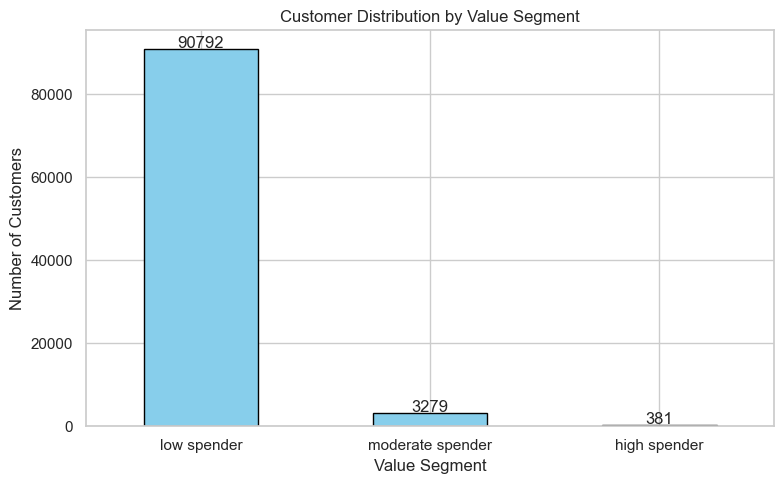

In [39]:
# Create a bar chart for customer segments
value_counts = customer_metrics.groupby('value_segment')['customer_unique_id'].nunique()

# Set figure size
plt.figure(figsize=(8, 5))

# Create bar chart
value_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add chart title and labels
plt.title('Customer Distribution by Value Segment')
plt.xlabel('Value Segment')
plt.ylabel('Number of Customers')

# Show exact values on top of each bar
for index, value in enumerate(value_counts):
    plt.text(index, value + 200, str(value), ha='center')

# Set x-axis labels horizontally
plt.xticks(rotation=0)

# Display the chart
plt.tight_layout()
plt.show()


The bar chart reveals a highly skewed distribution of customer value. Specifically:

* `Low spenders` constitute the overwhelming majority, with `90,792 customers`.
* `Moderate spenders` account for a significantly smaller segment, with `3,279 customers`.
* `High spenders` represent a minimal portion, with only `381 customers`.

#### `Business Observation:`

The business has a **very large low-value customer base**, while **high-value customers are extremely limited**. This suggests an opportunity to:

* **Enhance customer value** by upselling or cross-selling to low and moderate spenders.
* **Develop targeted retention strategies** for high spenders due to their rarity and likely high contribution to revenue.
* **Segment marketing efforts** to better engage moderate and high spenders and potentially grow these segments.

In summary, this distribution also indicates a potential imbalance between customer volume and value contribution that should be addressed for sustainable growth.


### 2. **Sales Performance Analysis:**
- Determine top-performing product categories, sellers, and regions.
- Identify trends in payment methods and revenue streams.
- Correlate lead qualification to closed deals and revenue outcomes

### Determine top-performing product categories, sellers, and regions.
  - `Which product categories, sellers, or regions perform best?`

In [40]:
# Merge product info
merged_product = pd.merge(
    products_clean[['product_id', 'product_category_name']],
    product_cat_name_clean[['product_category_name', 'product_category_name_english']],
    on='product_category_name',
    how='left'
)

# Merge product info with order items
merged_data = pd.merge(
    merged_product,
    order_items_clean[['order_id', 'product_id', 'seller_id', 'price']],
    on='product_id',
    how='left'
)

# Merge with customer region info (via orders and customers)
orders_customers = pd.merge(
    orders_clean[['order_id', 'customer_id']],
    customers_clean[['customer_id', 'customer_state']],
    on='customer_id',
    how='left'
)

merged_data = pd.merge(
    merged_data,
    orders_customers[['order_id', 'customer_state']],
    on='order_id',
    how='left'
)

merged_data.head()


,product_id,product_category_name,product_category_name_english,order_id,seller_id,price,customer_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery,e17e4f88e31525f7deef66779844ddce,5670f4db5b62c43d542e1b2d56b0cf7c,10.91,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art,5236307716393b7114b53ee991f36956,b561927807645834b59ef0d16ba55a24,248.00,RJ
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure,01f66e58769f84129811d43eefd187fb,7b07b3c7487f0ea825fc6df75abd658b,79.80,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby,143d00a4f2dde4e0364ee1821577adb3,c510bc1718f0f2961eaa42a23330681a,112.30,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,0be8ff43f22e456b4e0371b2245e4d01,37.90,SP


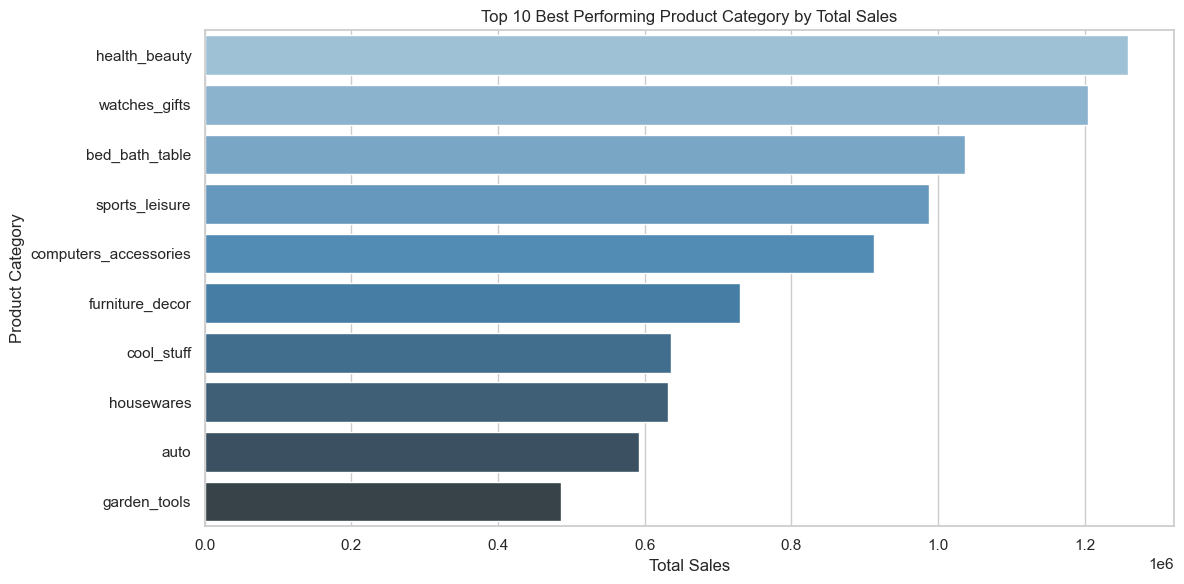

In [41]:
# Top Performing Product Categories
top_products = (
    merged_data
    .groupby('product_category_name_english')
    .agg(total_orders=('order_id', 'count'), total_sales=('price', 'sum'))
    .sort_values('total_sales', ascending=False)
    .reset_index()
    .head(10)
)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_products,
           x='total_sales',
           y='product_category_name_english',
           palette='Blues_d')
plt.title("Top 10 Best Performing Product Category by Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("Product Category")
plt.tight_layout()
plt.show()


The chart highlights the top 10 best-performing product categories by total sales from our analysis. A key business insight is that **health\_beauty** and **watches\_gifts** significantly outperform other categories, indicating strong consumer demand and possibly higher margins in these segments.

Conversely, **garden\_tools** and **auto** are at the bottom of the top 10, suggesting potential areas for marketing focus or reevaluation of inventory strategy. The businesses may consider reallocating resources or promotional efforts to capitalize on the high-performing categories while exploring ways to boost the visibility and appeal of the lower-performing ones.

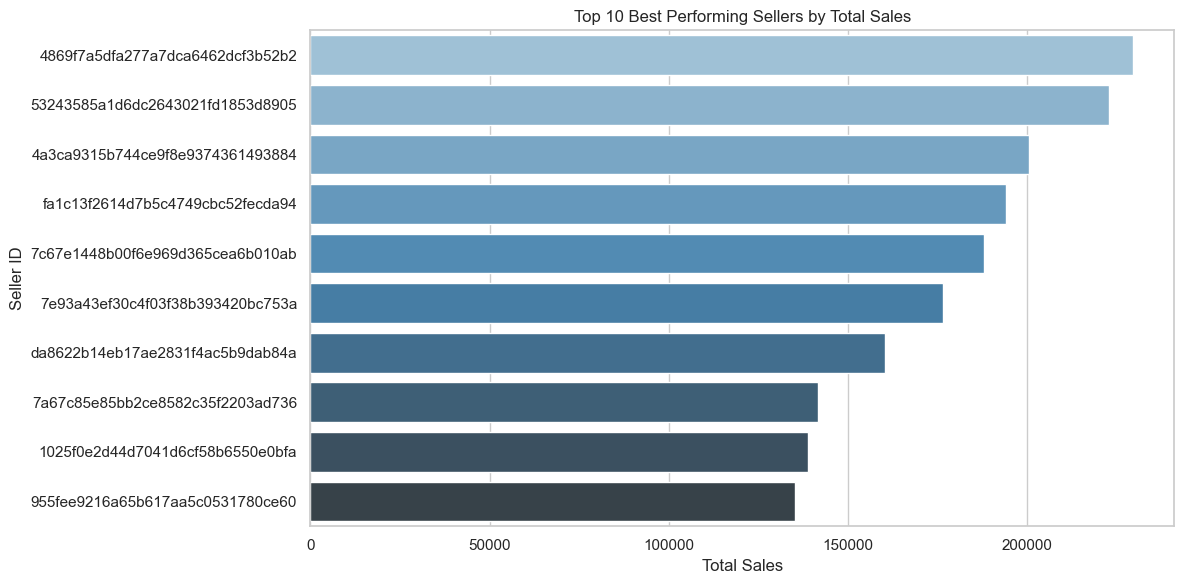

In [42]:
# Top Performing Sellers
seller_perf = (
    order_items_clean
    .groupby('seller_id')
    .agg(total_orders=('order_id', 'count'), total_sales=('price', 'sum'))
    .sort_values('total_sales', ascending=False)
    .reset_index()
    .head(10)
)

plt.figure(figsize=(12, 6))
sns.barplot(data=seller_perf,
           x='total_sales',
           y='seller_id',
           palette='Blues_d')
plt.title("Top 10 Best Performing Sellers by Total Sales")
plt.xlabel("Total Sales")
plt.ylabel("Seller ID")
plt.tight_layout()
plt.show()


The chart displays the top 10 best-performing sellers by total  from our analysis. The top two sellers have a noticeable lead, each generating over **200,000 in total sales**, while the rest trail behind, with sales gradually decreasing toward the 10th-ranked seller.

**`Business Insight:`**

There is a **significant concentration of sales among the top few sellers**, suggesting a possible power-law or Pareto distribution in seller performance. This implies that a small group of sellers is driving a large portion of the revenue. The business could:

* **Prioritize strategic partnerships** with top sellers through incentives or exclusive deals to maximize their output.
* **Analyze what differentiates top performers** (e.g., product mix, pricing, fulfillment speed) and apply these best practices to support mid-tier or new sellers.
* **Mitigate risk** by diversifying the seller base to avoid over-reliance on a few high performers.

This insight can guide seller development programs and resource allocation in marketplace strategy.

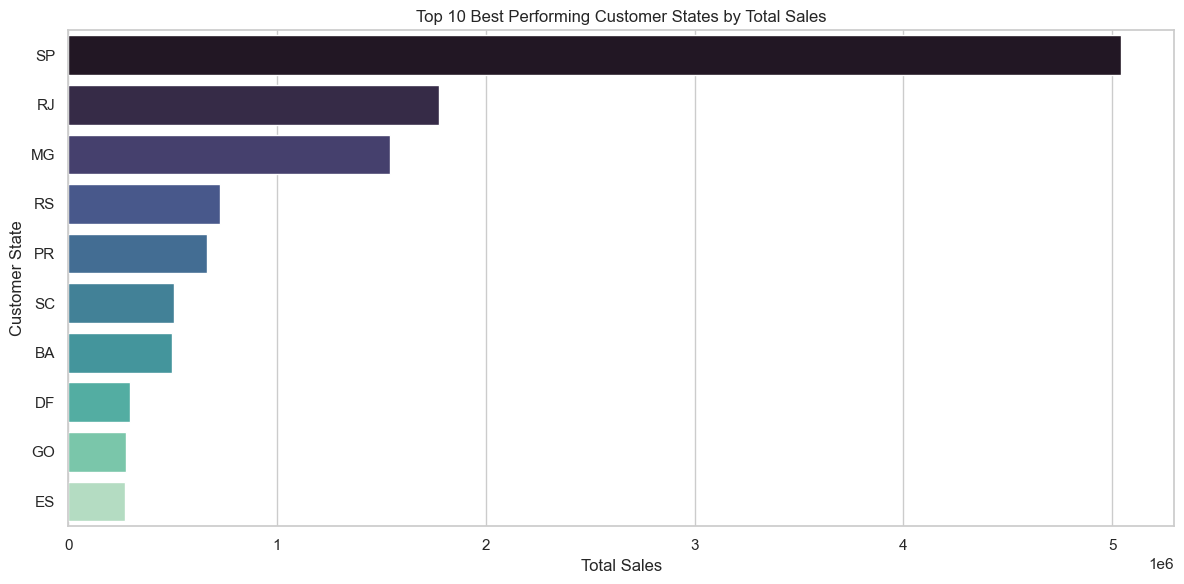

In [43]:
# Top Performing Regions (Customer States)
top_regions = (
    merged_data.groupby('customer_state')
    .agg(total_sales=('price', 'sum'))
    .sort_values('total_sales', ascending=False)
    .head(10)
    .reset_index()
)

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_regions, x='total_sales', y='customer_state', palette='mako')
plt.title('Top 10 Best Performing Customer States by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Customer State')
plt.tight_layout()
plt.show()



The chart shows the top 10 customer states by total sales. **São Paulo (SP)** stands out overwhelmingly as the highest-performing state, generating **more than twice the sales** of the next state, **Rio de Janeiro (RJ)**. Sales drop off progressively from there.

**`Business Insight:`**

There is a **clear regional concentration of customer spending**, with SP driving a disproportionate share of total revenue. This presents opportunities to:

* **Double down on marketing and logistics in SP** to maintain and expand its already strong performance.
* **Investigate customer behavior in SP** to replicate successful tactics in other high-potential but underperforming states like RJ and MG.
* **Explore targeted growth campaigns** in mid-tier states (RS, PR, SC) to boost market share and reduce dependency on one region.

This insight supports a data-driven regional strategy to optimize both growth and risk management.


### Identify trends in payment methods and revenue streams.
  - `What are the most used payment types and how do they relate to revenue?`

In [44]:
order_payments_clean.sample(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
98470,d83268beec893067aeef7a062622d721,1,boleto,1,69.69
2711,973f596fdd2295f00754dd37ab7eb684,1,credit_card,2,98.79
63672,b865e2a136f1f12fb4fcc46a1188d1c8,1,credit_card,7,200.04


In [45]:
# Check unique values of payment_type
order_payments_clean['payment_type'].unique()


array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [46]:
# Frequency of each payment type
payment_freq = order_payments_clean['payment_type'].value_counts().reset_index()
payment_freq.columns = ['payment_type', 'count']


In [47]:
# Total revenue by payment type
payment_value = order_payments_clean.groupby('payment_type')['payment_value'].sum().reset_index()
payment_value.columns = ['payment_type', 'total_value']

# Merge
payment_analysis = pd.merge(payment_freq, payment_value, on='payment_type')
payment_analysis = payment_analysis[payment_analysis['payment_type'] != 'not_defined']


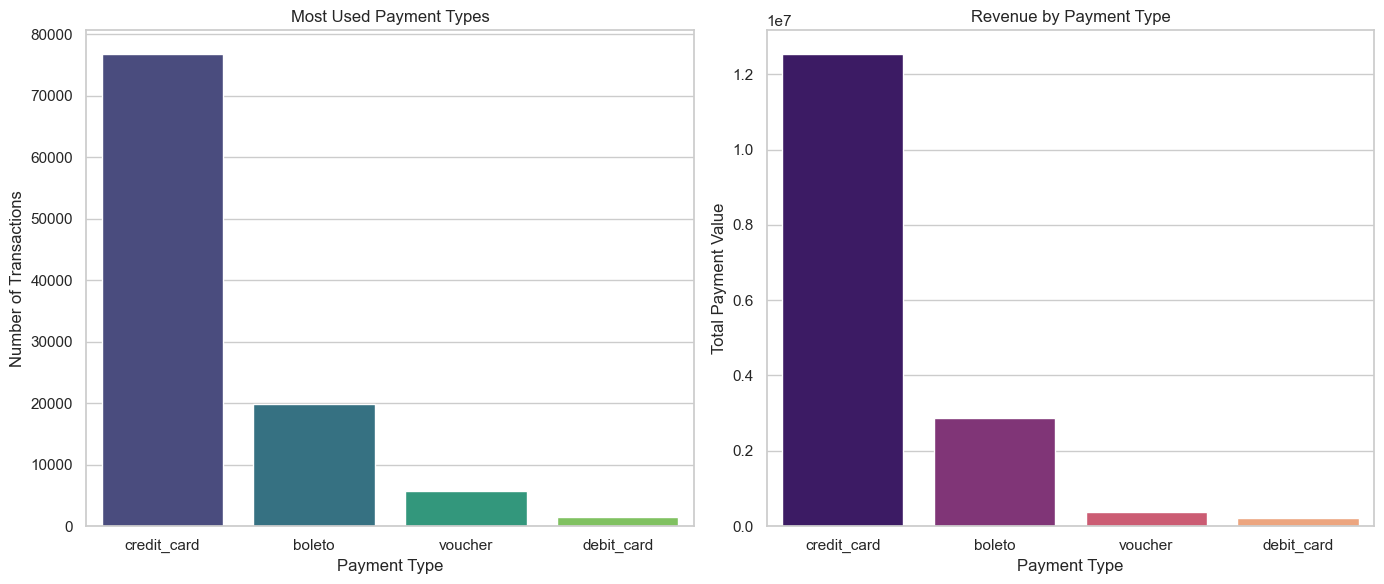

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Payment frequency
sns.barplot(x='payment_type', y='count', data=payment_analysis, palette='viridis', ax=axs[0])
axs[0].set_title('Most Used Payment Types')
axs[0].set_ylabel('Number of Transactions')
axs[0].set_xlabel('Payment Type')

# Revenue by payment type
sns.barplot(x='payment_type', y='total_value', data=payment_analysis, palette='magma', ax=axs[1])
axs[1].set_title('Revenue by Payment Type')
axs[1].set_ylabel('Total Payment Value')
axs[1].set_xlabel('Payment Type')

plt.tight_layout()
plt.show()


The two charts display:

* **Most Used Payment Types (left):** Credit cards dominate, accounting for the vast majority of transactions.
* **Revenue by Payment Type (right):** Credit cards also generate the highest total payment value, significantly outpacing other methods like `boleto, voucher, and debit card`.

#### `Business Insight:`

**Credit cards are both the most popular and the highest-revenue payment method**, making them central to the company's payment strategy. This presents key opportunities:

* **Optimize the credit card experience** (e.g., faster processing, promotions, installment plans) to reinforce and expand its usage.
* **Explore targeted incentives for alternative methods** (like boleto) to diversify payment options and reduce reliance on one method—especially useful for unbanked or underbanked customers.
* **Monitor risk and fees** associated with heavy dependence on credit card processors.

This insight supports enhancing credit card-related services while strategically growing alternative channels for broader financial inclusion.


### Correlate lead qualification to closed deals and revenue outcomes
- `Do qualified leads convert to revenue?`

In [49]:
# Merge the qualified and closed leads
merged_leads = pd.merge(
    qualified_leads_clean,
    closed_leads_clean,
    on='mql_id',
    how='left'  # keep all qualified leads
)

# Add a flag for closed deals
merged_leads['is_closed'] = merged_leads['won_date'].notna().astype(int)


Conversion Rate: 10.21%


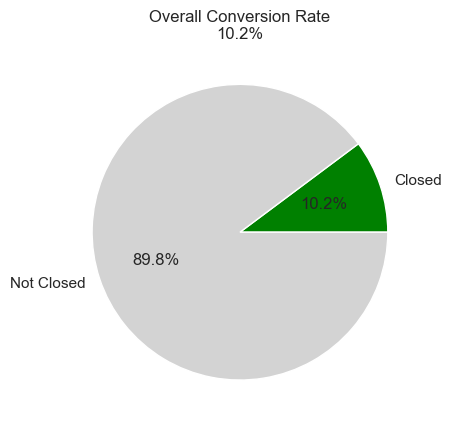

In [50]:
# --- Overall Conversion Rate ---
total_qualified_leads = merged_leads['mql_id'].nunique()
total_closed_leads = merged_leads[merged_leads['is_closed'] == 1]['mql_id'].nunique()
conversion_rate = round((total_closed_leads / total_qualified_leads) * 100, 2)

print(f"Conversion Rate: {conversion_rate}%")

# ---Pie Chart for Conversion ---
plt.figure()
plt.pie([conversion_rate, 100 - conversion_rate],
        labels=['Closed', 'Not Closed'],
        autopct='%.1f%%',
        colors=['green', 'lightgray'])
plt.title(f"Overall Conversion Rate\n{conversion_rate:.1f}%")
plt.show()


The pie chart illustrates an overall **conversion rate of 10.2%**, indicating that **only a small proportion of leads or opportunities (10.2%) were successfully closed**, while the remaining **89.8% were not converted**.

#### `Business Insight:`

A conversion rate of **10.2% suggests a significant inefficiency** in the sales funnel or customer acquisition process. This low closure ratio may be indicative of several underlying issues, such as poor lead qualification, suboptimal follow-up strategies, misalignment between offerings and customer needs, or friction in the sales process.

From a strategic standpoint, the organization should conduct a comprehensive analysis of its sales pipeline to:

* **Identify bottlenecks or drop-off points** in the buyer journey.
* **Enhance lead nurturing and qualification criteria** to improve the quality of prospects entering the pipeline.
* **Implement targeted sales training or CRM optimizations** to increase closure rates.

Improving conversion even marginally could have a material impact on revenue performance, making this a critical area for operational refinement and targeted intervention.


In [51]:
## --- Revenue Analysis (Closed Deals) ---
merged_leads['declared_monthly_revenue'] = pd.to_numeric(merged_leads['declared_monthly_revenue'], errors='coerce')
closed_revenue = merged_leads[merged_leads['is_closed'] == 1]['declared_monthly_revenue']

total_revenue = closed_revenue.sum()
average_revenue = closed_revenue.mean()

print(f"Total Revenue from Closed Deals: {total_revenue:,.2f}")
print(f"Average Revenue per Closed Lead: {average_revenue:,.2f}")


Total Revenue from Closed Deals: 61,634,006.00
Average Revenue per Closed Lead: 75,997.54


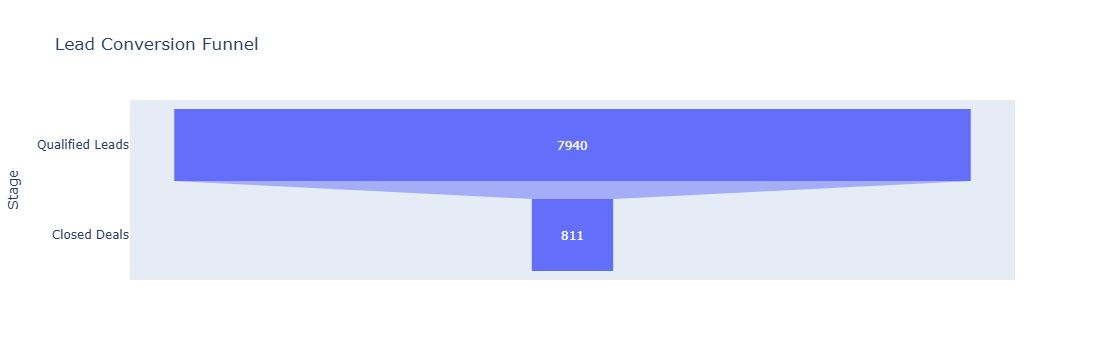

In [52]:
# Lead Conversion Funnel Chart 
import plotly.express as px
funnel_data = pd.DataFrame({
    'Stage': ['Qualified Leads', 'Closed Deals'],
    'Count': [total_qualified_leads, total_closed_leads]
})
fig = px.funnel(funnel_data, x='Count', y='Stage', title='Lead Conversion Funnel')
fig.show()



The **Lead Conversion Funnel** shows a steep drop from **7,940 qualified leads** to only **811 closed deals**, resulting in a **conversion rate of approximately 10.2%**—consistent with the previous analysis.

#### `Business Insight:`

This funnel highlights a **significant lead leakage**, with nearly **90% of qualified leads not converting** into sales. This suggests potential issues in later stages of the sales process. Key opportunities for the business include:

* **Reviewing the quality of lead qualification**: Are leads genuinely ready to buy, or are they entering the funnel prematurely?
* **Analyzing sales engagement and follow-up practices**: Low conversion might stem from lack of timely or effective follow-ups.
* **Identifying objections and drop-off reasons**: Use sales feedback or CRM analytics to understand why leads aren’t closing.

By tightening conversion mechanisms and improving post-qualification processes, the business could drastically improve deal closure rates and overall revenue efficiency.

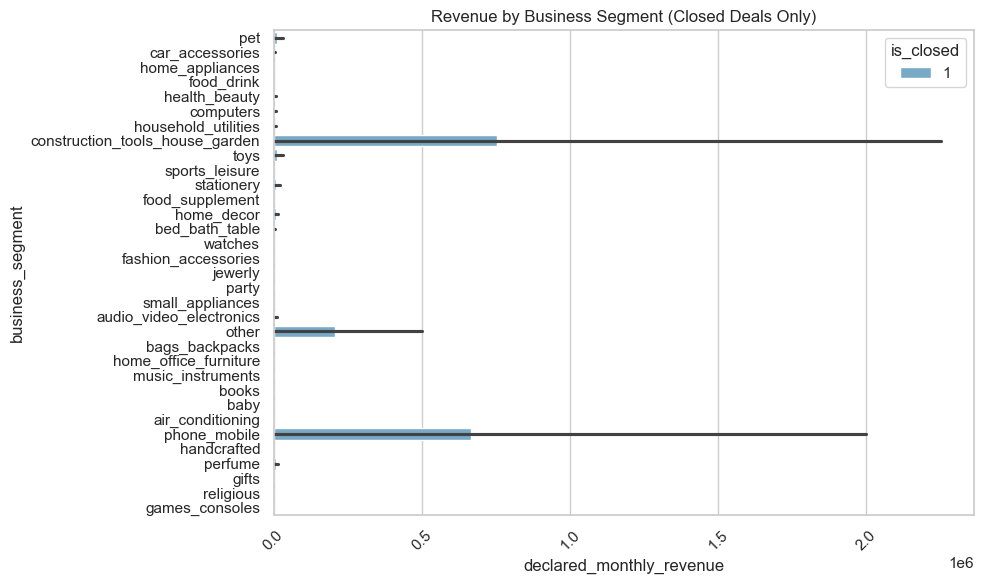

In [53]:
# Revenue by Segment
plt.figure(figsize=(10, 6))
sns.barplot(data=merged_leads[merged_leads['is_closed'] == 1],
            x='declared_monthly_revenue',
            y='business_segment',
            hue='is_closed',
            palette='Blues')
plt.title('Revenue by Business Segment (Closed Deals Only)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The chart from our analysis displays **revenue by business segment** for **closed deals only**. Three segments stand out with significantly higher declared monthly revenue:

* **Construction\_Tools\_House\_Garden**
* **Air\_Conditioning**
* **Phone\_Mobile**

All other segments contribute relatively minor amounts to total closed-deal revenue.

**`Business Insight:`**

The data suggests that **a few high-value business segments are driving the majority of revenue** from closed deals. This indicates a strong concentration of demand or high sales in these categories. Key strategic takeaways:

* **Double down on top-performing segments** by enhancing offerings, targeting similar customer profiles, and optimizing marketing for these categories.
* **Explore why lower-revenue segments underperform**—issues may include weak demand, poor conversion rates, or lower average deal value.
* **Diversify revenue sources** by identifying growth opportunities in mid-level segments (e.g., audio\_video\_electronics, household\_utilities), which show some potential but may need support.

This insight supports a **focused growth strategy**: leverage top earners while nurturing underutilized segments to reduce dependency and broaden revenue streams.


### 3. **Delivery & Logistics:**
- Compare estimated vs. actual delivery dates to measure delivery efficiency.
- Highlight cities or states with frequent delays.

### Compare estimated vs. actual delivery dates to measure delivery efficiency.
 - `What’s the gap between estimated vs. actual delivery?`

In [54]:
orders_clean.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date    1183
order_estimated_delivery_date       0
dtype: int64

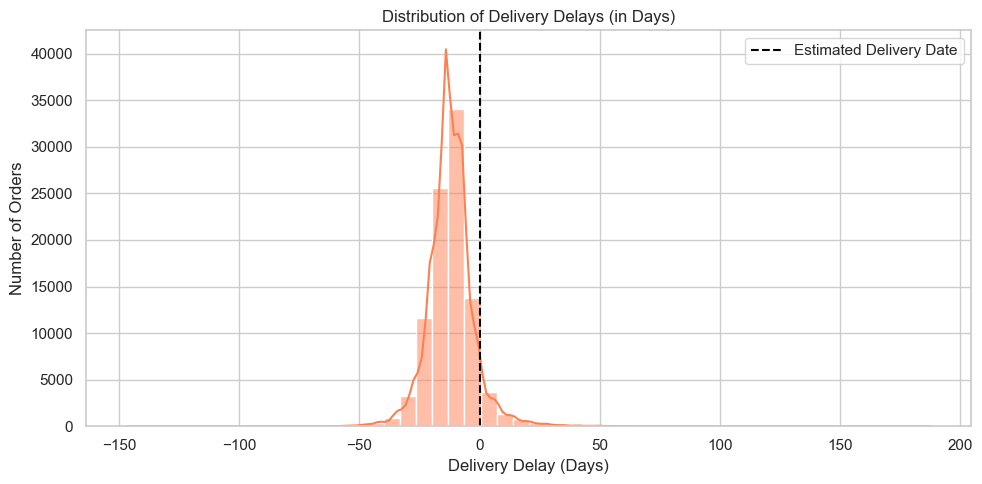

In [55]:
# Remove rows with missing delivery dates
orders_clean = orders_clean.dropna(subset = ['order_delivered_customer_date'])

# Calculate delivery delay
orders_clean['delivery_delay'] = (
    orders_clean['order_delivered_customer_date'] - 
    orders_clean['order_estimated_delivery_date']
).dt.days

# Categorize delays
orders_clean['delay_status'] = pd.cut(
    orders_clean['delivery_delay'],
    bins=[-float('inf'), -1, 0, float('inf')],
    labels=['Early', 'On Time', 'Late']
)

# Plot histogram
plt.figure(figsize=(10, 5))
sns.histplot(orders_clean['delivery_delay'], bins=50, kde=True, color='coral')
plt.axvline(0, color='black', linestyle='--', label='Estimated Delivery Date')
plt.title('Distribution of Delivery Delays (in Days)')
plt.xlabel('Delivery Delay (Days)')
plt.ylabel('Number of Orders')
plt.legend()
plt.tight_layout()
plt.show()


This gives the gap between estimated and actual delivery, and the sign of the value reveals delivery efficiency:

* `delivery_delay > 0 → Late`

* `delivery_delay = 0 → On-time`

* `delivery_delay < 0 → Early`

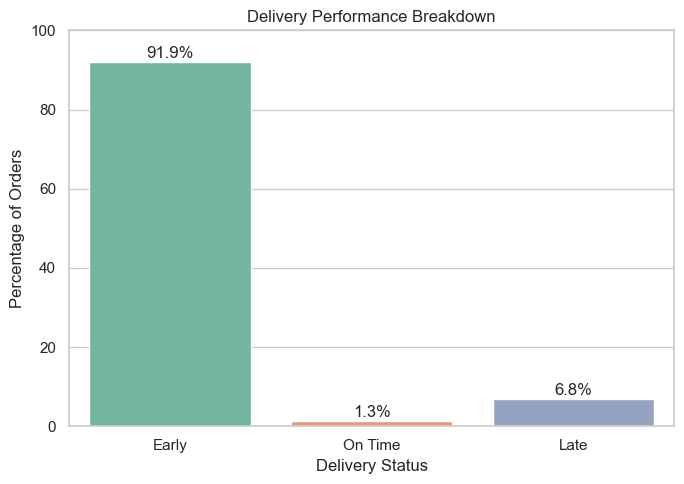

Delivery Delay Summary (in days):
count    96461.000000
mean       -11.875577
std         10.183476
min       -147.000000
25%        -17.000000
50%        -12.000000
75%         -7.000000
max        188.000000
Name: delivery_delay, dtype: float64

 Delivery Status Proportions:
delay_status
Early      91.89%
On Time     1.34%
Late        6.77%
Name: proportion, dtype: object


In [56]:
# Delivery Status Breakdown (Proportion of Early / On Time / Late)
status_counts = orders_clean['delay_status'].value_counts(normalize=True).sort_index() * 100

plt.figure(figsize=(7, 5))
sns.barplot(x=status_counts.index, y=status_counts.values, palette='Set2')
plt.title('Delivery Performance Breakdown')
plt.ylabel('Percentage of Orders')
plt.xlabel('Delivery Status')

for index, value in enumerate(status_counts.values):
    plt.text(index, value + 1, f"{value:.1f}%", ha='center')

plt.ylim(0, 100)
plt.tight_layout()
plt.show()

# Print Summary Statistics
print("Delivery Delay Summary (in days):")
print(orders_clean['delivery_delay'].describe())
print("\n Delivery Status Proportions:")
print(status_counts.round(2).astype(str) + '%')


The **Delivery Performance Breakdown** chart reveals that:

* **91.9%** of orders were delivered **early**
* Only **1.3%** were delivered **on time**
* **6.8%** were delivered **late**

The delivery delay summary also shows a **mean delay of -11.88 days**, indicating that, on average, deliveries are made nearly **12 days early**.

**`Business Insight:`**

This data reflects **exceptional delivery performance**, with the vast majority of orders arriving ahead of schedule. However, two key considerations emerge:

1. **Customer Satisfaction & Efficiency Opportunity**

   * While early deliveries are better than late ones, extremely early deliveries (some as much as 147 days early) may not always align with customer expectations or needs (e.g., in cases of time-sensitive goods or scheduled deliveries).
   * The company could **fine-tune delivery scheduling** to align more precisely with promised timelines, improving **logistics efficiency** and possibly **reducing warehousing or handling costs**.

2. **Minimizing Late Deliveries**

   * Although low at 6.8%, **late deliveries should be analyzed** to identify common causes (e.g., region, product type, courier).
   * Mitigating even this small percentage can enhance brand reliability and reduce customer churn.

Overall, the business is performing strongly in delivery but should explore **optimization** rather than just speed—balancing punctuality, customer expectation, and cost.

### Highlight cities or states with frequent delays.
 - `Which cities/states have frequent delays?`

Top 10 States with Highest Average Delivery Delays:
   customer_state  delivery_delay
3              AP       72.500000
21             RR       36.400000
2              AM       30.250000
0              AC       18.666667
24             SE       16.196078
5              CE       15.181818
19             RN       14.477273
18             RJ       13.522408
16             PI       13.348485
13             PA       12.820755


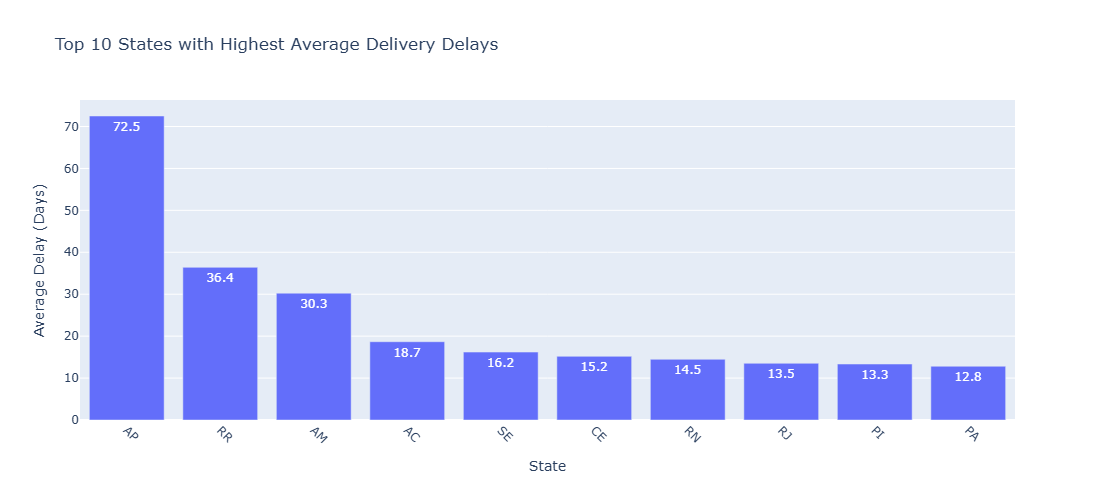

In [57]:
import plotly.express as px

# Convert timestamps to datetime
orders_clean['order_estimated_delivery_date'] = pd.to_datetime(orders_clean['order_estimated_delivery_date'])
orders_clean['order_delivered_customer_date'] = pd.to_datetime(orders_clean['order_delivered_customer_date'])

# Calculate delivery delay
orders_clean['delivery_delay'] = (orders_clean['order_delivered_customer_date'] - orders_clean['order_estimated_delivery_date']).dt.days

# Merge with customers to get city/state
orders_customers = orders_clean.merge(customers_clean, on='customer_id')

# Average delay by state
delay_by_state = orders_customers[orders_customers['delivery_delay'] > 0].groupby('customer_state')['delivery_delay'].mean().reset_index()
# Sort by average delay and select top 10 states
top_delay_states = delay_by_state.sort_values('delivery_delay', ascending=False).head(10)

# Print results
print("Top 10 States with Highest Average Delivery Delays:")
print(top_delay_states)

# Visualize using Plotly
fig = px.bar(
    top_delay_states,
    x='customer_state',
    y='delivery_delay',
    title='Top 10 States with Highest Average Delivery Delays',
    labels={'customer_state': 'State', 'delivery_delay': 'Average Delay (Days)'},
    text='delivery_delay',
    height=500
)
fig.update_traces(texttemplate='%{text:.1f}', textposition='auto')
fig.update_layout(
    xaxis_title="State",
    yaxis_title="Average Delay (Days)",
    xaxis_tickangle=45,
    showlegend=False
)
fig.show()


The chart shows significant variation in average delivery delays across Brazilian states. Notably, **Amapá (AP)** experiences the longest average delivery delay—exceeding **70 days**, followed by **Roraima (RR)** and **Amazonas (AM)** with delays over **30 days**. These high delays are likely due to geographic remoteness and logistical challenges. In contrast, more centrally located or urbanized states such as **São Paulo (SP)**, **Minas Gerais (MG)**, and **Distrito Federal (DF)** exhibit much lower average delays, typically under **10 days**, indicating better delivery infrastructure and efficiency. This insight highlights a key opportunity to optimize logistics and delivery operations in the northern and more remote regions.


Top 10 Cities with Highest Average Delivery Delays:
          customer_city  delivery_delay
668            montanha           181.0
790            perdizes           162.0
1097           teutonia           153.0
366             formosa           152.0
610              macapa           144.0
709         novo brasil           126.0
858            quintana           121.0
948            santaluz           104.0
480             itacare            81.0
219   capinzal do norte            78.0


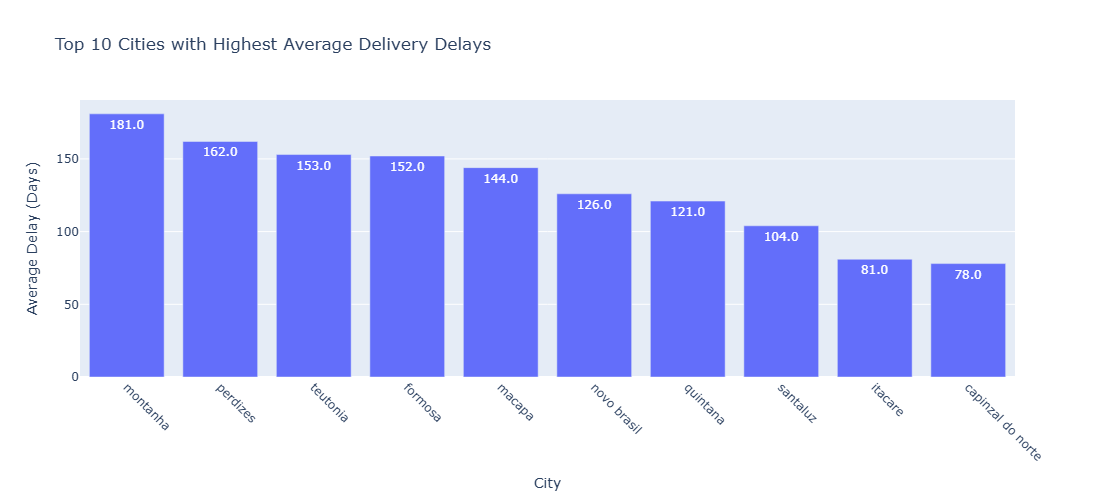

In [58]:
import plotly.express as px
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Calculate average delivery delay by city (only for orders with delays > 0)
delay_by_city = orders_customers[orders_customers['delivery_delay'] > 0].groupby('customer_city')['delivery_delay'].mean().reset_index()

# Sort by average delay and select top 10 cities
top_delay_cities = delay_by_city.sort_values('delivery_delay', ascending=False).head(10)

# Print results
print("Top 10 Cities with Highest Average Delivery Delays:")
print(top_delay_cities)

# Visualize using Plotly
fig = px.bar(
    top_delay_cities,
    x='customer_city',
    y='delivery_delay',
    title='Top 10 Cities with Highest Average Delivery Delays',
    labels={'customer_city': 'City', 'delivery_delay': 'Average Delay (Days)'},
    text='delivery_delay',
    height=500
)
fig.update_traces(texttemplate='%{text:.1f}', textposition='auto')
fig.update_layout(
    xaxis_title="City",
    yaxis_title="Average Delay (Days)",
    xaxis_tickangle=45,
    showlegend=False
)
fig.show()


The chart highlights the top 10 cities with the highest average delivery delays. *Montanha* has the most significant delay, averaging **181 days**, followed by *Perdizes* and *Teutônia* with **162** and **153 days** respectively. Even the 10th-ranked city, *Capinzal do Norte*, experiences substantial delays averaging **78 days**, indicating systemic logistical issues in these areas that may require targeted intervention.


### **4. Review & Satisfaction Insights:**
- Analyze the distribution of review scores by product category or seller.
- Determine if longer delivery times impact review sentiment.

### Analyze the distribution of review scores by product category or seller.
 - `How are review scores distributed across categories or sellers?`

In [59]:
# Merge necessary columns
merged_reviews = (
    order_reviews_clean[['order_id', 'review_score']]
    .merge(order_items_clean[['order_id', 'product_id', 'seller_id']], on='order_id')
    .merge(products_clean[['product_id', 'product_category_name']], on='product_id')
    .merge(product_cat_name_clean[['product_category_name', 'product_category_name_english']],
           on='product_category_name')
)

# Preview the result
merged_reviews.tail()

,order_id,review_score,product_id,seller_id,product_category_name,product_category_name_english
110744,2a8c23fee101d4d5662fa670396eb8da,5,4fb209073dc2ab6a6d3c259a7c285501,5343d0649eca2a983820bfe93fc4d17e,moveis_decoracao,furniture_decor
110745,22ec9f0669f784db00fa86d035cf8602,5,3a33c980b62eb1ef3b8ae61b6fc6fe55,46dc3b2cc0980fb8ec44634e21d2718e,brinquedos,toys
110746,55d4004744368f5571d1f590031933e4,5,8ba0118a487ec8671aed57e5ef846574,17ca9b9e9b9ef8fdb529001b49ebb50f,papelaria,stationery
110747,7725825d039fc1f0ceb7635e3f7d9206,4,73a7fbf8c1048131f3b531af31bcdf0e,8d956fec2e4337affcb520f56fd8cbfd,esporte_lazer,sports_leisure
110748,90531360ecb1eec2a1fbb265a0db0508,1,8fbd36d3b045f5f38b252b1513478f38,7e3f87d16fb353f408d467e74fbd8014,informatica_acessorios,computers_accessories


In [60]:
# Inspect the merged data
merged_reviews.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110749 entries, 0 to 110748
Data columns (total 6 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   order_id                       110749 non-null  object
 1   review_score                   110749 non-null  int32 
 2   product_id                     110749 non-null  object
 3   seller_id                      110749 non-null  object
 4   product_category_name          110749 non-null  object
 5   product_category_name_english  110749 non-null  object
dtypes: int32(1), object(5)
memory usage: 4.6+ MB


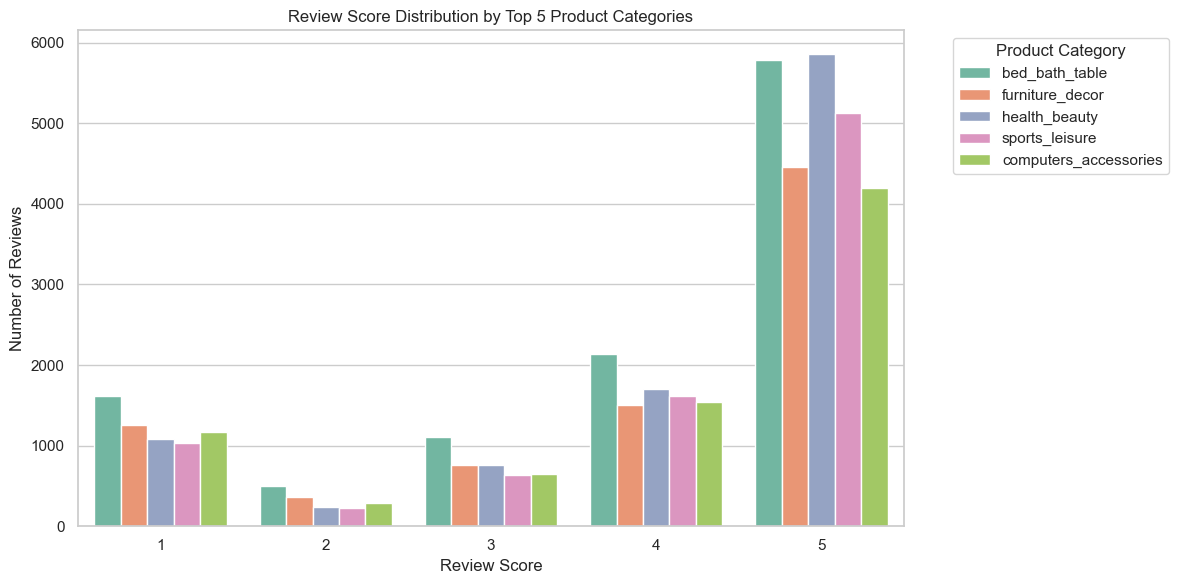

In [61]:
# Top 5 product categories by number of reviews
top_categories = (
    merged_reviews['product_category_name_english']
    .value_counts()
    .nlargest(5)
    .index
)

# Filter to only include those
filtered_by_cat = merged_reviews[merged_reviews['product_category_name_english'].isin(top_categories)]

# Plot distribution of review scores by category
plt.figure(figsize=(12, 6))
sns.countplot(
    data=filtered_by_cat,
    x='review_score',
    hue='product_category_name_english',
    palette='Set2'
)
plt.title('Review Score Distribution by Top 5 Product Categories')
plt.xlabel('Review Score')
plt.ylabel('Number of Reviews')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


The bar chart from pour analysis illustrates the **review score distribution** across the **top 5 product categories**:

* **bed\_bath\_table**
* **furniture\_decor**
* **health\_beauty**
* **sports\_leisure**
* **computers\_accessories**

Key highlights:

* All categories show a **strong right skew**, with `Review Score 5` receiving the highest number of reviews.
* **Health\_beauty** and **bed\_bath\_table** lead in the number of 5-star reviews (close to 5,800–5,900).
* However, **bed\_bath\_table** also has the highest number of `1-star reviews`, indicating polarized customer experiences.
* **Furniture\_decor** has fewer total 5-star reviews compared to others, possibly suggesting lower overall satisfaction or volume.

#### `Business Insights:`

1. **Health\_Beauty has the strongest customer satisfaction**
   With the highest 5-star reviews and comparatively low 1–2 star ratings, this category reflects consistently positive customer experiences, signaling strong product quality or service alignment.

2. **Bed\_Bath\_Table shows high volume but inconsistent satisfaction**
   Although it receives the most reviews across all ratings, the significant count of both high (5-star) and low (1-star) scores may point to quality inconsistency, logistics issues, or expectation mismatches.

3. **Computers\_Accessories and Sports\_Leisure exhibit moderate satisfaction**
   These categories show decent volumes of 5-star reviews but also moderate 1-star counts. This indicates opportunities to improve product reliability or post-sale support.

4. **Furniture\_Decor underperforms in positive feedback**
   Its 5-star reviews are notably lower, and 1–3 star reviews are relatively high, suggesting customer dissatisfaction, possibly due to product mismatch, damage, or delivery issues.

#### `Recommendation:`

* **Focus quality control efforts** on categories like bed\_bath\_table to reduce 1-star experiences.
* **Leverage health\_beauty** as a benchmark for operational and service best practices.
* For **furniture\_decor**, perform root-cause analysis (e.g., returns, complaints, shipping conditions) to identify and correct issues affecting customer perception.


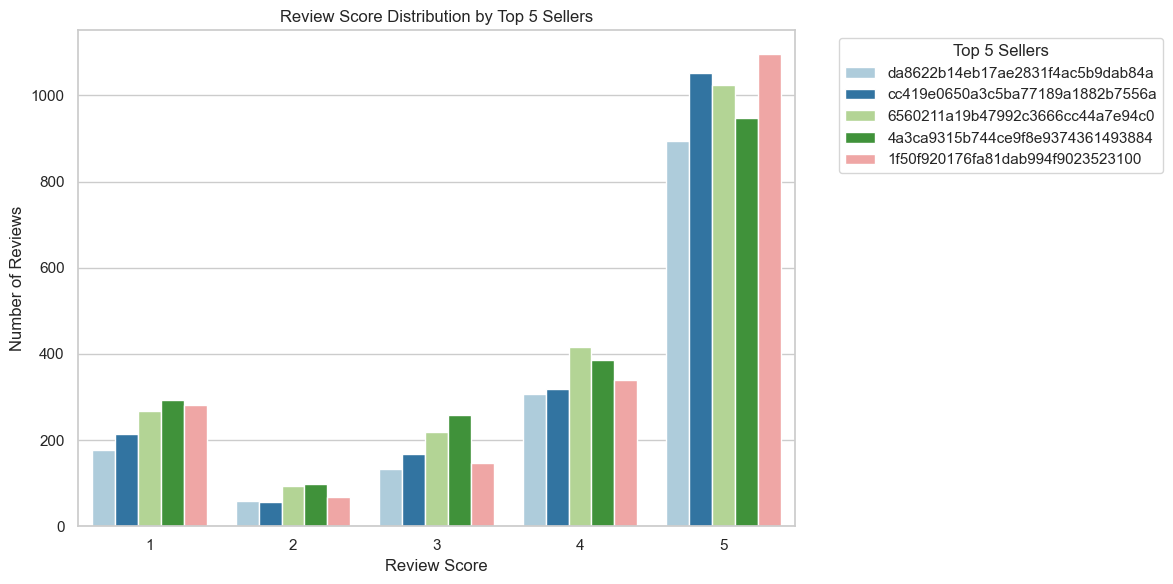

In [62]:
# Top 5 sellers by number of reviews
top_sellers = merged_reviews['seller_id'].value_counts().nlargest(5).index
filtered_by_seller = merged_reviews[merged_reviews['seller_id'].isin(top_sellers)]

# Plot distribution of review scores by seller
plt.figure(figsize=(12, 6))
sns.countplot(
    data=filtered_by_seller,
    x='review_score',
    hue='seller_id',
    palette='Paired'
)
plt.title('Review Score Distribution by Top 5 Sellers')
plt.xlabel('Review Score')
plt.ylabel('Number of Reviews')
plt.legend(title='Top 5 Sellers', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The chart shows the **review score distribution** for the **top 5 sellers** identified by their unique IDs. Review scores range from 1 to 5, and the number of reviews for each score is represented for each seller.

Key insights:

* All five sellers have a **high concentration of 5-star reviews**, indicating generally strong performance.
* Seller `1f50f920176fa81dab994f9023523100` stands out with the highest count of 5-star reviews (\~1100), despite also having a notable number of 1-star ratings.
* Seller `4a3ca9315b744ce9f8e9374361493884` has relatively high 1-star and 3-star reviews, suggesting mixed customer experiences.
* Seller `6560211a19b47992c3666ccc44a7e94c0` performs well with a strong 5-star showing and relatively fewer low-score reviews (1–3), pointing to consistency in service quality.

#### `Business Insights:`

1. **Top-performing seller in terms of customer delight**:

   * Seller `6560211a...94c0` appears to deliver consistent satisfaction, with high 5-star and comparatively fewer negative reviews. This seller could be leveraged for best practice benchmarking.

2. **Volume ≠ Quality**:

   * Seller `1f50f92...3100` has the highest volume of 5-star reviews but also a disproportionately high number of 1-star reviews, hinting at potential quality or service inconsistency. A quality assurance audit or post-sale service review may be warranted.

3. **Seller `4a3ca93...3884` at risk of customer dissatisfaction**:

   * Despite decent 5-star ratings, high 1–3 star review volumes suggest variable customer experiences, possibly due to delayed deliveries, product quality issues, or expectation gaps.

#### `Recommendations:`

* **Investigate 1-star drivers** for sellers with high negative review counts (esp. `1f50...3100` and `4a3ca...3884`) to identify process or fulfillment weaknesses.
* **Promote or replicate practices of consistently rated sellers** like `6560211a...94c0`.
* Use seller performance metrics like this to **refine seller rankings, incentives, or visibility** on the platform.

-----

### Determine if longer delivery times impact review sentiment.
 - `Does late delivery affect reviews?`

In [63]:
# Merge review data with delivery delay info
delivery_reviews = pd.merge(
    order_reviews_clean[['order_id', 'review_score']],
    orders_clean[['order_id', 'delivery_delay', 'delay_status']],
    on='order_id'
)

# Preview the result
delivery_reviews.sample(4)


,order_id,review_score,delivery_delay,delay_status
88395,d7d1d0e6c3f409480d2ea528b338e5ca,5,-21,Early
26607,f911adf78cd1ef94a8412126ab558e81,4,-12,Early
37290,1b2fd2d45589bc249ee9ae90fdb05a6b,3,0,On Time
2955,bac2b6fc8f5a8adbd94a4f4ed0f510d1,5,-16,Early


In [64]:
# Inspect the merged data
delivery_reviews.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96344 entries, 0 to 96343
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   order_id        96344 non-null  object  
 1   review_score    96344 non-null  int32   
 2   delivery_delay  96344 non-null  int64   
 3   delay_status    96344 non-null  category
dtypes: category(1), int32(1), int64(1), object(1)
memory usage: 1.9+ MB


In [65]:
# Classify review sentiment
delivery_reviews['review_sentiment'] = delivery_reviews['review_score'].apply(
    lambda x: 'negative' if x <= 2 else 'neutral' if x == 3 else 'positive'
)

# Preview
delivery_reviews.sample(3)


,order_id,review_score,delivery_delay,delay_status,review_sentiment
90854,6b2b0edb95053b55efeb09177b6510c3,5,2,Late,positive
29312,254b6101a615cb031624d5631cabf648,5,-26,Early,positive
3792,baff178d792fd40014fd024031a90fff,5,-5,Early,positive


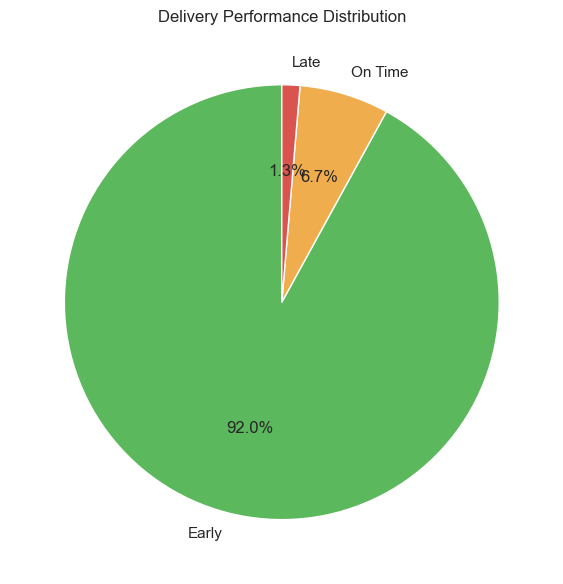

In [66]:
# Pie chart of delivery performance
plt.figure(figsize=(6, 6))
delivery_reviews['delay_status'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['#5cb85c', '#f0ad4e', '#d9534f'],
    labels=['Early', 'On Time', 'Late']
)
plt.title('Delivery Performance Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()


The **Delivery Performance Distribution** pie chart indicates the following:

* **92.0%** of orders are delivered **early**.
* **6.7%** are delivered **on time**.
* Only **1.3%** are delivered **late**.

#### `Business Insight:`

1. **Exceptional Logistics Efficiency**:
   The overwhelming majority of deliveries are completed **ahead of schedule**, reflecting **excellent operational capacity**, efficient supply chain management, and possibly overestimated delivery windows.

2. **Customer Perception Risk**:
   While early deliveries are generally positive, excessive early deliveries (92%) may occasionally **inconvenience customers**—especially for time-sensitive goods (e.g., perishables, event-based items).

3. **Room to Optimize**:
   The **low "on-time" rate** (6.7%) suggests a mismatch between promised delivery estimates and actual performance. This could indicate **overly padded delivery lead times**, and adjusting them could improve customer experience and trust in estimated timelines.

#### `Recommendation:`

* **Review and recalibrate delivery time estimates** to better reflect actual performance.
* **Segment early deliveries by product type** to identify where earlier-than-expected delivery is truly valuable versus unnecessary.
* Maintain current standards while using this strength as a **marketing asset** (e.g., "92% of orders arrive early").


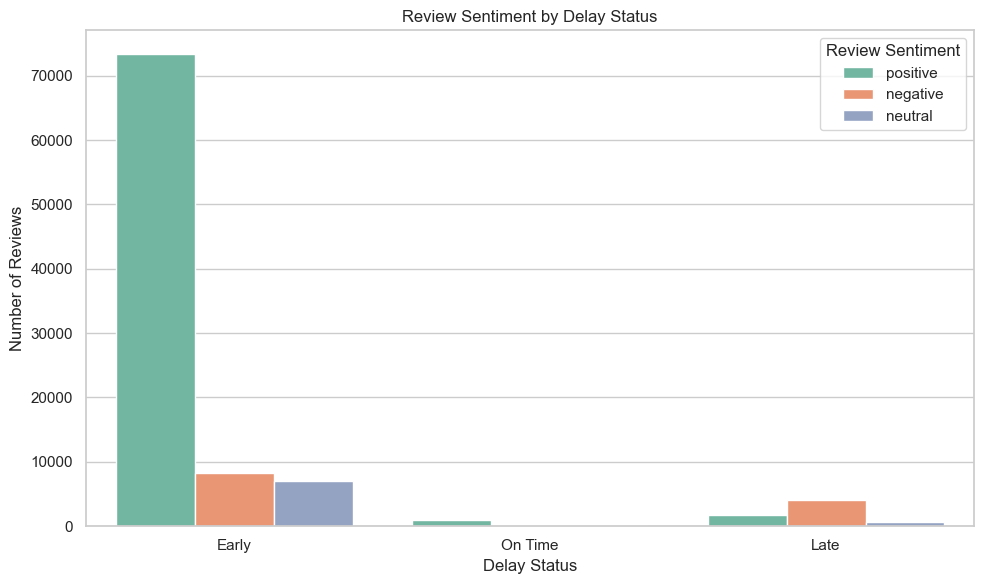

In [67]:
# Sentiment by delivery performance
plt.figure(figsize=(10, 6))
sns.countplot(data=delivery_reviews, x='delay_status', hue='review_sentiment', palette='Set2')
plt.title('Review Sentiment by Delay Status')
plt.xlabel('Delay Status')
plt.ylabel('Number of Reviews')
plt.legend(title='Review Sentiment')
plt.tight_layout()
plt.show()



The chart shows **Review Sentiment by Delay Status**, segmented into *early*, *on-time*, and *late* deliveries:

* **Early deliveries** have overwhelmingly **positive reviews** (over 70,000), with relatively fewer negative and neutral responses.
* **Late deliveries** are associated with **more negative reviews** than positive or neutral.
* **On-time deliveries** receive the **least feedback overall**, with minimal sentiment variation.

#### `Business Insight:`

1. **Early Delivery Drives Customer Satisfaction**
   The dominance of **positive sentiment** for early deliveries demonstrates that exceeding delivery expectations is a **key driver of customer happiness** and loyalty.

2. **Late Deliveries Hurt Reputation**
   Late deliveries correlate with a spike in **negative sentiment**, which can directly impact **brand perception** and repeat business. Even a small portion of late deliveries can have a **disproportionate negative effect**.

3. **On-Time Delivery is Underappreciated**
   Very few reviews follow on-time deliveries, possibly indicating **neutral customer response** when expectations are merely met. This suggests **limited brand impact** when simply adhering to estimated timelines.

#### `Recommendation:`

* **Maintain and promote early delivery performance**, as it strongly supports positive sentiment and customer retention.
* **Reduce late deliveries aggressively**, even if rare—they generate a `high concentration of negative sentiment`.
* Explore ways to **encourage feedback** for on-time deliveries, perhaps through `post-delivery engagement`, to capture more sentiment and insights from these transactions.


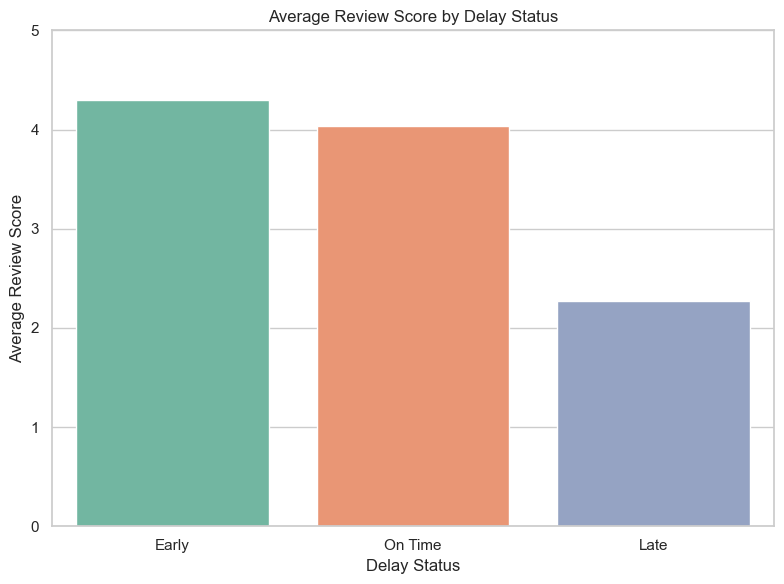

In [68]:
# Average review score by delivery status
avg_reviews = delivery_reviews.groupby('delay_status')['review_score'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=avg_reviews, x='delay_status', y='review_score', palette='Set2')
plt.title('Average Review Score by Delay Status')
plt.ylabel('Average Review Score')
plt.xlabel('Delay Status')
plt.ylim(0, 5)
plt.tight_layout()
plt.show()


The bar chart from our analysis displays the **Average Review Score by Delay Status**. Key points:

* **Early deliveries** receive the highest average review score (\~4.3).
* **On-time deliveries** have slightly lower scores (\~4.0).
* **Late deliveries** receive significantly lower average scores (\~2.3).


#### `Business Insight:`

1. **Early Delivery Boosts Satisfaction**
   Delivering early leads to **higher customer satisfaction**, reflected in elevated review scores. This suggests customers reward over-performance in logistics.

2. **Punctuality Meets, But Doesn’t Delight**
   While on-time delivery maintains a solid average score, it's notably lower than early delivery. Meeting expectations is good, but **exceeding them earns more loyalty**.

3. **Late Deliveries Have Severe Consequences**
   A dramatic drop in average score for late deliveries highlights the **risk to brand reputation and customer retention**. Even a small fraction of delays can significantly **drag down overall performance ratings**.


#### `Recommendation:`

* **Optimize for early deliveries** where possible to consistently impress customers.
* **Investigate causes of late deliveries** and implement corrective action plans for high-risk regions or logistics partners.
* Consider **proactive communication or incentives** (e.g. discount codes, apologies) for late deliveries to mitigate damage to customer sentiment.


In [69]:
from scipy.stats import pearsonr

# Correlation: delivery delay vs. review score
corr_data = delivery_reviews[['delivery_delay', 'review_score']].dropna()
corr_coeff, p_value = pearsonr(corr_data['delivery_delay'], corr_data['review_score'])

print(f" Pearson Correlation Coefficient: {corr_coeff:.3f}")
print(f" P-value: {p_value:.3g}")


 Pearson Correlation Coefficient: -0.267
 P-value: 0


**`Pearson Correlation Coefficient: -0.267`**

* The correlation is `negative`, which means as `delivery delay increases`, `review scores tend to decrease`.
* The strength of the correlation is `weak to moderate`:
  * A perfect negative correlation is -1.
  * The value (-0.267) suggests a `mild negative relationship`, not a strong one.

**`P-value: 0`**
* A p-value of 0 (technically very close to zero) means the correlation is `statistically significant`.
* In other words, there's `strong evidence that this negative relationship is not due to random chance`.

In conclusion, `"There is a statistically significant, weak negative relationship between delivery delay and customer review scores. As delivery delays increase, customers tend to leave slightly lower review ratings."`

While the effect isn't strong, it's real — and it matters. This insight can support the business efforts to:
* Improve delivery timelines,
* Manage customer expectations more effectively,
* Prioritize regions or sellers with poor delivery performance to protect customer satisfaction.

In [70]:
# Statistical analysis
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(delivery_reviews['delivery_delay'], delivery_reviews['review_sentiment'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Squared Statistic: {chi2}, p-value: {p}")

Chi-Squared Statistic: 19057.589781395553, p-value: 0.0


**`Summary of Chi-Squared Test Result`**

The Chi-Squared test confirms a `statistically significant relationship` between `delivery delay` and `review sentiment` **(Chi² = 19057.59, p-value = 0.0).** This indicates that `review sentiment is not independent of delivery performance`.

**`Key Insight`**:
* `Late deliveries` are strongly associated with `negative reviews`,
* while `early/on-time deliveries` correlate with `positive or neutral reviews`.

**This reinforces our earlier finding** from the **Pearson correlation coefficient (-0.267)**, which also showed a **negative relationship** between delivery delay and review score. Together, both results validate the impact of delivery timeliness on customer satisfaction.

-----


### 5. **Geospatial visualization of seller vs. customer locations to suggest delivery optimization:**

In [71]:
import plotly.graph_objects as go
import plotly.io as pio

# Set renderer for Jupyter Notebook
pio.renderers.default = 'iframe'

# Merge customer and seller geolocation data
customer_geo = customers.merge(
    geolocation,
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='left'
)

seller_geo = sellers.merge(
    geolocation,
    left_on='seller_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='left'
)

# Sample 10,000 points each
customer_geo_sample = customer_geo.sample(n=10000, random_state=42)
seller_geo_sample = seller_geo.sample(n=10000, random_state=42)

# Create geospatial plot
fig = go.Figure()

# Add customers
fig.add_trace(go.Scattergeo(
    lon=customer_geo_sample['geolocation_lng'],
    lat=customer_geo_sample['geolocation_lat'],
    text=customer_geo_sample['customer_city'],
    mode='markers',
    marker=dict(size=4, color='blue', opacity=0.5),
    name='Customers'
))

# Add sellers
fig.add_trace(go.Scattergeo(
    lon=seller_geo_sample['geolocation_lng'],
    lat=seller_geo_sample['geolocation_lat'],
    text=seller_geo_sample['seller_city'],
    mode='markers',
    marker=dict(size=4, color='red', opacity=0.5),
    name='Sellers'
))

# Layout settings
fig.update_layout(
    title='Customer vs. Seller Locations (Sample of 10,000 Each)',
    geo=dict(
        scope='south america',
        projection_type='mercator',
        showland=True,
        landcolor='rgb(217, 217, 217)',
    ),
    showlegend=True,
    height=600
)

fig.show()


The geospatial visualization reveals a clear geographic imbalance: **sellers (red dots)** are heavily concentrated in Brazil’s **southeastern and southern regions**, particularly around urban hubs like São Paulo, Rio de Janeiro, and Paraná, while **customers (blue dots)** are **more broadly distributed** across the country, including remote **northern and northeastern areas**.

This spatial mismatch creates potential **logistical inefficiencies**, especially for customers located far from seller clusters. These inefficiencies can translate into **longer delivery times, increased operational costs**, and ultimately, **lower customer satisfaction** in underserved regions.

To address these challenges and enhance the overall **delivery experience**, the business should:

* **Expand fulfillment infrastructure**—such as warehouses or distribution hubs—closer to high-demand but underserved areas, especially in the north and northeast.
* **Partner with regional sellers or third-party logistics providers** to extend last-mile delivery capabilities.
* **Leverage geolocation insights** to refine delivery routes, optimize resource allocation, and inform pricing strategies tied to delivery timelines.

Balancing the geographic distribution of sellers with that of customers will not only improve operational efficiency but also enable **faster, more reliable deliveries**, supporting long-term **customer retention and revenue growth**.

-----


### Create a dashboard to track business KPIs using Python Dash.

In [72]:
from jupyter_dash import JupyterDash
from dash import dcc, html, Input, Output
import plotly.express as px
import pandas as pd

# ================================
# DATA PREPARATION (CLEAN DATASETS)
# ================================

# Orders + Customers
orders_customers = orders_clean.merge(
    customers_clean[['customer_id', 'customer_state', 'customer_city']],
    on='customer_id',
    how='left'
)

# Orders + Items + Products + Category
order_products = (
    order_items_clean
    .merge(products_clean, on='product_id', how='left')
    .merge(product_cat_name_clean, on='product_category_name', how='left')
    .merge(
        orders_clean[['order_id', 'delivery_delay', 'delay_status']],
        on='order_id',
        how='left'
    )
)

# Reviews
reviews_orders = order_reviews_clean.merge(
    orders_clean[['order_id', 'delivery_delay']],
    on='order_id',
    how='left'
)

# Leads
leads_data = qualified_leads_clean.merge(
    closed_leads_clean[['mql_id', 'won_date']],
    on='mql_id',
    how='left'
)
leads_data['converted'] = leads_data['won_date'].notna().astype(int)

# ================================
# DASH APP
# ================================

app = JupyterDash(__name__)

app.layout = html.Div(style={'padding': '20px'}, children=[

    html.H1("E-commerce Business KPI Dashboard", style={'textAlign': 'center'}),

    # ================= FILTER =================
    dcc.Dropdown(
        id='state_filter',
        options=[{'label': s, 'value': s}
                 for s in sorted(orders_customers['customer_state'].dropna().unique())],
        placeholder="Filter by State",
        style={'width': '300px', 'marginBottom': '20px'}
    ),

    # ================= KPI CARDS =================
    html.Div([
        html.Div(id='revenue_kpi', className='kpi'),
        html.Div(id='on_time_kpi', className='kpi'),
        html.Div(id='review_kpi', className='kpi'),
        html.Div(id='conversion_kpi', className='kpi'),
    ], style={
        'display': 'grid',
        'gridTemplateColumns': 'repeat(4,1fr)',
        'gap': '15px',
        'marginBottom': '25px'
    }),

    # ================= CHARTS =================
    dcc.Graph(id='revenue_by_category'),
    dcc.Graph(id='delay_by_state'),

    html.Div([
        dcc.Graph(id='review_vs_delay'),
        dcc.Graph(id='conversion_donut')
    ], style={'display': 'grid', 'gridTemplateColumns': '1fr 1fr'}),

    dcc.Graph(id='lead_conversion_origin')
])

# ================================
# CALLBACK
# ================================

@app.callback(
    [
        Output('revenue_kpi', 'children'),
        Output('on_time_kpi', 'children'),
        Output('review_kpi', 'children'),
        Output('conversion_kpi', 'children'),
        Output('revenue_by_category', 'figure'),
        Output('delay_by_state', 'figure'),
        Output('review_vs_delay', 'figure'),
        Output('conversion_donut', 'figure'),
        Output('lead_conversion_origin', 'figure')
    ],
    Input('state_filter', 'value')
)
def update_dashboard(state):

    # ---------------- Filter data ----------------
    orders_f = orders_customers.copy()
    products_f = order_products.copy()
    reviews_f = reviews_orders.copy()

    if state:
        orders_f = orders_f[orders_f['customer_state'] == state]
        products_f = products_f.merge(
            orders_f[['order_id']], on='order_id'
        )
        reviews_f = reviews_f.merge(
            orders_f[['order_id']], on='order_id'
        )

    # ---------------- KPIs ----------------
    total_revenue = products_f['price'].sum()
    on_time_rate = (orders_f['delay_status'] != 'Late').mean() * 100
    avg_review = reviews_f['review_score'].mean()
    conversion_rate = leads_data['converted'].mean() * 100

    # ---------------- Revenue by Category ----------------
    rev_cat = (
        products_f
        .groupby('product_category_name_english')['price']
        .sum()
        .sort_values(ascending=False)
        .head(10)
        .reset_index()
    )

    fig1 = px.bar(
        rev_cat,
        x='price',
        y='product_category_name_english',
        color='price',
        color_continuous_scale='Viridis',
        title='Top 10 Product Categories by Revenue'
    )

    # ---------------- Delay by State ----------------
    delay_state = (
        orders_f[orders_f['delivery_delay'] > 0]
        .groupby('customer_state')['delivery_delay']
        .mean()
        .reset_index()
    )

    fig2 = px.bar(
        delay_state,
        x='customer_state',
        y='delivery_delay',
        color='delivery_delay',
        color_continuous_scale='Reds',
        title='Average Delivery Delay by State'
    )

    # ---------------- Review vs Delay ----------------
    fig3 = px.scatter(
        reviews_f,
        x='delivery_delay',
        y='review_score',
        trendline='ols',
        color='review_score',
        color_continuous_scale='Blues',
        title='Review Score vs Delivery Delay'
    )

    # ---------------- Conversion Doughnut ----------------
    conv_counts = leads_data['converted'].value_counts().reset_index()
    conv_counts.columns = ['Converted', 'Count']
    conv_counts['Converted'] = conv_counts['Converted'].map({1: 'Converted', 0: 'Not Converted'})

    fig4 = px.pie(
        conv_counts,
        names='Converted',
        values='Count',
        hole=0.45,
        color_discrete_sequence=px.colors.qualitative.Set2,
        title='Overall Lead Conversion Rate'
    )

    # ---------------- Conversion by Origin ----------------
    conv_origin = (
        leads_data
        .groupby('origin')['converted']
        .mean()
        .reset_index()
        .sort_values('converted', ascending=False)
    )

    fig5 = px.bar(
        conv_origin,
        x='converted',
        y='origin',
        color='converted',
        color_continuous_scale='Teal',
        title='Lead Conversion Rate by Origin'
    )

    return (
        f"💰 Total Revenue: R${total_revenue:,.0f}",
        f"🚚 On-Time Delivery Rate: {on_time_rate:.1f}%",
        f"⭐ Avg Review Score: {avg_review:.2f}/5",
        f"📈 Lead Conversion Rate: {conversion_rate:.1f}%",
        fig1,
        fig2,
        fig3,
        fig4,
        fig5
    )



In [73]:
# Run App
app.run_server(mode='inline', height=950)


### Suggest A/B test opportunities from the funnel or product level.

To support strategic decision-making and drive measurable improvements in `conversion rate`, `customer satisfaction`, and `sales performance`, we propose the following A/B testing opportunities based on insights from the data funnel and product lifecycle:

#### 1. **A/B Test Opportunity: Landing Page Optimization**

* **Hypothesis**: Changing the layout or content of high-traffic landing pages will improve conversion from MQL (Marketing Qualified Lead) to closed deal.
* **Why**: From the funnel analysis, several `landing_page_id`s had 100% drop-off. Testing variations in page design, CTAs (call to actions), and form length could reduce abandonment.
* **Test Ideas**:

  * Version A: Original page.
  * Version B: Page with simplified form and prominent CTA.
* **Metric**: Conversion rate (MQL → SQL or closed deal).

#### 2. **A/B Test Opportunity: Delivery Experience Messaging**

* **Hypothesis**: Setting more accurate delivery expectations can reduce negative reviews.
* **Why**: Delay analysis showed strong correlation between delivery delays and low review scores.
* **Test Ideas**:

  * Version A: Default messaging ("Your order will arrive soon").
  * Version B: Dynamic ETA messaging with confidence intervals or proactive updates.
* **Metric**: Review score and customer complaint rate.

#### 3. **A/B Test Opportunity: Product Pricing vs. Freight Incentive**

* **Hypothesis**: Bundling products with free or discounted shipping can boost conversion for high-freight categories.
* **Why**: Feature importance in the review score model highlighted **freight\_value** as impactful.
* **Test Ideas**:

  * Version A: Standard product pricing.
  * Version B: Slightly increased product price but with free shipping.
* **Metric**: Conversion rate and average order value (AOV).

#### 4. **A/B Test Opportunity: Review Collection Timing**

* **Hypothesis**: Timing of review prompts affects likelihood and quality of customer reviews.
* **Why**: Review score modeling is affected by post-delivery experience. Customers receiving late deliveries may cool off over time.
* **Test Ideas**:

  * Version A: Review prompt sent immediately after delivery.
  * Version B: Review prompt sent 3 days later.
* **Metric**: Response rate and average review score.

#### 5. **A/B Test Opportunity: Lead Nurture Email Sequencing**

* **Hypothesis**: Personalized lead nurture emails improve conversion.
* **Why**: Funnel drop-off analysis shows low conversion among certain lead types or business segments.
* **Test Ideas**:

  * Version A: Generic nurture sequence.
  * Version B: Customized content based on business segment and lead type.
* **Metric**: Conversion from MQL to closed deal.

### Final Recommendation:

Before executing any A/B test:

* Prioritize based on **business impact**, **data availability**, and **technical feasibility**.
* Ensure **sample size** is statistically significant using power calculations.
* Use tools like **Optimizely**, **Google Optimize**, or **custom Dash dashboards** to implement and monitor tests.
* 
---

### **6. Predictive Modeling:**
- Predict order delivery delays using order, customer, and logistics data.
- Predict review scores based on order characteristics and delays.

### Predict order delivery delays using order, customer, and logistics data.

In order to achieve this, we will compute the `geodesic distance` of the seller_customer_distance_km

In [74]:
# Preview the first 3 rows of the logistic data
geolocation_clean.head(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP


In [75]:
from geopy.distance import geodesic

# Aggregate Geolocation Data
geolocation_agg = (
    geolocation_clean
    .groupby("geolocation_zip_code_prefix")
    .agg({
        "geolocation_lat": "mean",
        "geolocation_lng": "mean",
        "geolocation_city": lambda x: x.mode()[0],
        "geolocation_state": lambda x: x.mode()[0]
    })
    .reset_index()
)

# Merge Geo Info into Customers
customers_geo = customers_clean.merge(
    geolocation_agg,
    left_on="customer_zip_code_prefix",
    right_on="geolocation_zip_code_prefix",
    how="left"
).rename(columns={
    "geolocation_lat": "customer_lat",
    "geolocation_lng": "customer_lng",
})

# Keep only necessary customer columns
customers_geo = customers_geo[[
    "customer_id", "customer_city", "customer_state", "customer_lat", "customer_lng"
]]

# Merge Geo Info into Sellers
# =========================
sellers_geo = sellers_clean.merge(
    geolocation_agg,
    left_on="seller_zip_code_prefix",
    right_on="geolocation_zip_code_prefix",
    how="left"
).rename(columns={
    "geolocation_lat": "seller_lat",
    "geolocation_lng": "seller_lng",
})

# Keep only necessary seller columns
sellers_geo = sellers_geo[[
    "seller_id", "seller_city", "seller_state", "seller_lat", "seller_lng"
]]

# Merge Orders with Customers
orders_customers = orders_clean.merge(
    customers_geo,
    on="customer_id",
    how="left"
)

# Merge Order Items with Sellers
order_items_sellers = order_items_clean.merge(
    sellers_geo,
    on="seller_id",
    how="left"
)

# Combine Orders, Customers, and Sellers
orders_full = order_items_sellers.merge(
    orders_customers,
    on="order_id",
    how="left"
)

# Compute Geodesic Distance
def compute_geodesic_distance(row):
    try:
        origin = (row["seller_lat"], row["seller_lng"])
        destination = (row["customer_lat"], row["customer_lng"])
        return geodesic(origin, destination).kilometers
    except:
        return np.nan

orders_full["seller_customer_distance_km"] = orders_full.apply(compute_geodesic_distance, axis=1)

# Preview the final Data
orders_full.sample(5)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_city,seller_state,seller_lat,...,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_delay,delay_status,customer_city,customer_state,customer_lat,customer_lng,seller_customer_distance_km
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:00,19.90,11.85,sao paulo,SP,-23.539639,...,2017-12-12 01:07:00,2017-12-18 22:03:00,2018-01-04,-17.0,Early,guararapes,SP,-21.250677,-50.646525,484.851492
11743,1aa78d3a94e9d8054d63fd230c076bf6,1,083d6108def7421be9778dd0ecd11fa6,f5a590cf36251cf1162ea35bef76fe84,2017-11-29 22:14:00,299.99,10.91,sao bernardo do campo,SP,-23.714909,...,2017-11-28 00:12:00,2017-11-29 17:09:00,2017-12-08,-9.0,Early,sao paulo,SP,-23.531854,-46.491269,21.268485
100406,e3a3cf20ed164fa04fd9d5f905b4f48d,1,850e40acc5b9a8809677aaf1dc5d533c,34056b8b55c1775a22af2331670a799c,2018-07-27 13:50:00,64.80,19.64,penapolis,SP,-21.436452,...,2018-07-26 14:12:00,2018-08-03 15:52:00,2018-08-13,-10.0,Early,dourados,MS,-22.218822,-54.813070,497.211636
26199,3b981944c4d2df767cc524ebcb06d7e9,2,de480e3ae31eea2d2d97d694c43172fc,1838dd9b8977065acf51d95e0053ea7a,2018-06-14 18:08:00,28.90,17.13,belo horizonte,MG,-19.882081,...,2018-06-13 14:48:00,2018-06-20 20:12:00,2018-07-04,-14.0,Early,sao jose dos pinhais,PR,-25.546518,-49.151201,819.827816
36230,522527427b29a3fefe865a02a7a78962,1,e2c3ed9aaddfd2312a6a5fe9b3ddadd3,46dc3b2cc0980fb8ec44634e21d2718e,2017-10-13 07:35:00,99.99,15.45,rio de janeiro,RJ,-22.935434,...,2017-10-09 18:51:00,2017-10-24 19:43:00,2017-10-30,-6.0,Early,pato branco,PR,-26.243639,-52.674239,1027.970929


`Next, we  will merged orders_full with logistic data`

In [76]:
# Merge orders and product information
predict_data = (
    pd.merge(
        orders_full[
            [
                'product_id', 'freight_value', 'delivery_delay', 'order_approved_at',
                'seller_city', 'seller_state', 'customer_city', 'customer_state',
                'order_delivered_carrier_date', 'delay_status', 'order_purchase_timestamp',
                'seller_customer_distance_km'
            ]
        ],
        products_clean[
            [
                'product_id', 'product_weight_g', 'product_length_cm', 
                'product_height_cm', 'product_width_cm'
            ]
        ],
        on='product_id',
        how='inner'
    )
    .drop_duplicates()  # remove duplicate rows
    .dropna()           # remove any rows with null values
)

# Display a random sample
predict_data.sample(4, random_state=42)


,product_id,freight_value,delivery_delay,order_approved_at,seller_city,seller_state,customer_city,customer_state,order_delivered_carrier_date,delay_status,order_purchase_timestamp,seller_customer_distance_km,product_weight_g,product_length_cm,product_height_cm,product_width_cm
84480,50556c630443502c11acde1c320fe278,28.28,-12.0,2017-11-15 19:26:00,petropolis,RJ,belo horizonte,MG,2017-11-16 15:34:00,Early,2017-11-15 19:10:00,305.498350,250.0,16.0,2.0,20.0
24481,d696750e550fd0f733979dd7e5dff921,16.94,-10.0,2017-08-06 23:10:00,joinville,SC,maua,SP,2017-08-09 14:40:00,Early,2017-08-06 22:53:00,373.092614,950.0,53.0,5.0,13.0
92549,a92930c327948861c015c919a0bcb4a8,15.65,-34.0,2018-06-17 21:53:00,sao paulo,SP,rio de janeiro,RJ,2018-06-18 10:06:00,Early,2018-06-17 21:29:00,357.070117,250.0,16.0,2.0,20.0
1511,6ed0ed10d62b45f3de46933b0b2989a6,23.34,-15.0,2018-05-09 09:55:00,sao paulo,SP,canoinhas,SC,2018-05-10 08:53:00,Early,2018-05-09 09:42:00,485.202177,700.0,30.0,40.0,50.0


### **`Feature Engineering`**

We will derive new features from existing ones

In [77]:
# Check that there is no zero values in product features
predict_data[['product_length_cm', 'product_height_cm', 'product_width_cm']].isnull().sum()
(predict_data[['product_length_cm', 'product_height_cm', 'product_width_cm']] == 0).sum()


product_length_cm    0
product_height_cm    0
product_width_cm     0
dtype: int64

In [78]:
# Compute product volume
predict_data['product_volume_cm3'] = (
    predict_data['product_length_cm'] * 
    predict_data['product_height_cm'] * 
    predict_data['product_width_cm']
)

In [79]:
# check the data info
predict_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98279 entries, 0 to 111045
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   product_id                    98279 non-null  object        
 1   freight_value                 98279 non-null  float64       
 2   delivery_delay                98279 non-null  float64       
 3   order_approved_at             98279 non-null  datetime64[ns]
 4   seller_city                   98279 non-null  object        
 5   seller_state                  98279 non-null  object        
 6   customer_city                 98279 non-null  object        
 7   customer_state                98279 non-null  object        
 8   order_delivered_carrier_date  98279 non-null  datetime64[ns]
 9   delay_status                  98279 non-null  category      
 10  order_purchase_timestamp      98279 non-null  datetime64[ns]
 11  seller_customer_distance_km   98

In [80]:
# Calculate the time (in hours) from purchase to order approval
predict_data['approval_time_hrs'] = (
    (predict_data['order_approved_at'] - predict_data['order_purchase_timestamp'])
    .dt.total_seconds() / 3600
)

# Calculate the time (in hours) from order approval to when the order was handed to the carrier
predict_data['shipping_start_time_hrs'] = (
    (predict_data['order_delivered_carrier_date'] - predict_data['order_approved_at'])
    .dt.total_seconds() / 3600
)

# Preview first 4 rows
predict_data.sample(4)

,product_id,freight_value,delivery_delay,order_approved_at,seller_city,seller_state,customer_city,customer_state,order_delivered_carrier_date,delay_status,order_purchase_timestamp,seller_customer_distance_km,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3,approval_time_hrs,shipping_start_time_hrs
6212,1d9263e74c3e8e57d3a7bd505b7b871e,15.10,-3.0,2017-12-21 02:11:00,belo horizonte,MG,varzea paulista,SP,2018-01-10 01:28:00,Early,2017-12-20 10:02:00,473.863498,200.0,28.0,2.0,40.0,2240.0,16.150000,479.283333
97900,95fb075ea52306f2188ae4199c5928a8,14.08,-14.0,2018-05-09 03:51:00,guarulhos,SP,uchoa,SP,2018-05-09 14:06:00,Early,2018-05-08 10:02:00,393.908055,3150.0,34.0,14.0,39.0,18564.0,17.816667,10.250000
69103,2136c70bbe723d338fab53da3c03e6dc,15.23,-7.0,2018-03-07 20:29:00,sao paulo,SP,mesquita,RJ,2018-03-08 15:23:00,Early,2018-03-07 20:12:00,353.567173,200.0,16.0,2.0,11.0,352.0,0.283333,18.900000
6667,722dc14e0848efdb771dca6de2929c41,17.98,-35.0,2017-05-03 14:02:00,videira,SC,belo horizonte,MG,2017-05-05 08:44:00,Early,2017-05-03 13:26:00,1079.792354,250.0,16.0,16.0,11.0,2816.0,0.600000,42.700000


Our data is now clean and ready for modeling

### **`Model Building`**

We will build a RandomForestRegressor model to predict delivery delay

In [81]:
predict_data.columns

Index(['product_id', 'freight_value', 'delivery_delay', 'order_approved_at',
       'seller_city', 'seller_state', 'customer_city', 'customer_state',
       'order_delivered_carrier_date', 'delay_status',
       'order_purchase_timestamp', 'seller_customer_distance_km',
       'product_weight_g', 'product_length_cm', 'product_height_cm',
       'product_width_cm', 'product_volume_cm3', 'approval_time_hrs',
       'shipping_start_time_hrs'],
      dtype='object')

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Feature selection
X = predict_data[[
    'freight_value',
    'seller_city', 'seller_state',
    'customer_city', 'customer_state',
    'seller_customer_distance_km',
    'product_weight_g',
    'approval_time_hrs',
    'shipping_start_time_hrs'
]]

y = predict_data['delivery_delay']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')

# Encode categorical variables manually using frequency encoding
categorical_cols = ['seller_city', 'seller_state', 'customer_city', 'customer_state']

for col in categorical_cols:
    # Compute frequency encoding on training set
    freq = X_train[col].value_counts(normalize=True)
    # Map both train and test
    X_train[col] = X_train[col].map(freq)
    X_test[col] = X_test[col].map(freq)
    # If a category appears in test but not train, fill with 0
    X_test[col] = X_test[col].fillna(0)

# Scale numeric columns
numeric_cols = [
    'freight_value',
    'seller_customer_distance_km',
    'product_weight_g',
    'approval_time_hrs',
    'shipping_start_time_hrs'
]

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


Training set size: 78623 samples
Test set size: 19656 samples


In [83]:
# Train RandomForestRegressor
model = RandomForestRegressor(
    n_estimators=100,  # fewer trees to speed up
    max_depth=15,     # limit depth
    n_jobs=-1,        # use all CPU cores
    random_state=42
)

model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [84]:
# Evaluate the model
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.3f}")

MSE: 86.54
RMSE: 9.30
MAE: 6.16
R² Score: 0.115


The Random Forest regression model achieved a `Mean Squared Error (MSE) of 86.54`, corresponding to a `Root Mean Squared Error (RMSE) of 9.30` and a `Mean Absolute Error (MAE) of 6.16`. This indicates that, on average, the model’s predictions deviate from the actual delivery delay by approximately 6 to 9 units, with RMSE reflecting the presence of some larger prediction errors.

The R² score of 0.115 shows that the model explains about `11.5%` of the variability in delivery delays. While this confirms that the model captures meaningful patterns from order, customer, and logistics features, a substantial portion of the variation in delivery delays remains unexplained. This suggests that delivery performance is influenced by additional factors not included in the dataset, such as carrier-specific operations, route congestion, seasonal demand, or external disruptions.

Overall, our results indicate that the model provides better-than-baseline predictions and establishes a solid foundation for delivery delay estimation, though further feature engineering and model refinement would be required to achieve stronger predictive performance.

---

### Predict review scores based on order characteristics and delays.

In [85]:
# Merge the datasets

# Select only required columns
orders_subset = orders_full[[
    'order_id',
    'price',
    'freight_value',
    'delivery_delay',
    'seller_customer_distance_km'
]]

payments_subset = order_payments_clean[[
    'order_id',
    'payment_type'
]]

reviews_subset = order_reviews_clean[[
    'order_id',
    'review_score'
]]

# Merge orders + payments
merged_df = orders_subset.merge(
    payments_subset,
    on='order_id',
    how='left'
)

# Merge with reviews (target)
merged_df = merged_df.merge(
    reviews_subset,
    on='order_id',
    how='inner'  # keep only orders with reviews
)

# Drop rows with missing target
merged_df = merged_df.dropna(subset=['review_score'])

merged_df.head()


,order_id,price,freight_value,delivery_delay,seller_customer_distance_km,payment_type,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29,-9.0,301.773645,credit_card,5
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93,-3.0,584.635144,credit_card,4
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87,-14.0,311.548958,credit_card,5
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79,-6.0,294.373438,credit_card,4
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14,-16.0,647.195585,credit_card,5


In [86]:
# Feature selection & encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Features and target
X = merged_df[[
    'price',
    'freight_value',
    'delivery_delay',
    'seller_customer_distance_km',
    'payment_type'
]]

y = merged_df['review_score']

# Identify categorical & numeric columns
categorical_features = ['payment_type']
numeric_features = [
    'price',
    'freight_value',
    'delivery_delay',
    'seller_customer_distance_km'
]

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numeric_features)
    ]
)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [87]:
# Train an xgboost model
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

# XGBoost model
xgb_model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)

# Pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb_model)
])

# Train
model.fit(X_train, y_train)


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [88]:
# Model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predictions
y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.3f}")


MSE: 1.45
RMSE: 1.21
MAE: 0.94
R² Score: 0.233


>The model achieves an RMSE of 1.21 and an MAE of 0.94, meaning that, on average, predicted review scores deviate from actual customer ratings by about 1 star. The R² score of 0.233 indicates that the model explains roughly 23% of the variance in review scores, which is reasonable given >that customer reviews are subjective and influenced by many unobserved factors such as personal expectations and product quality. Overall, the model captures a meaningful relationship between delivery delays, order characteristics, and customer satisfaction, but there is still substantial room for improvement by incorporating richer product-level and customer behavior features

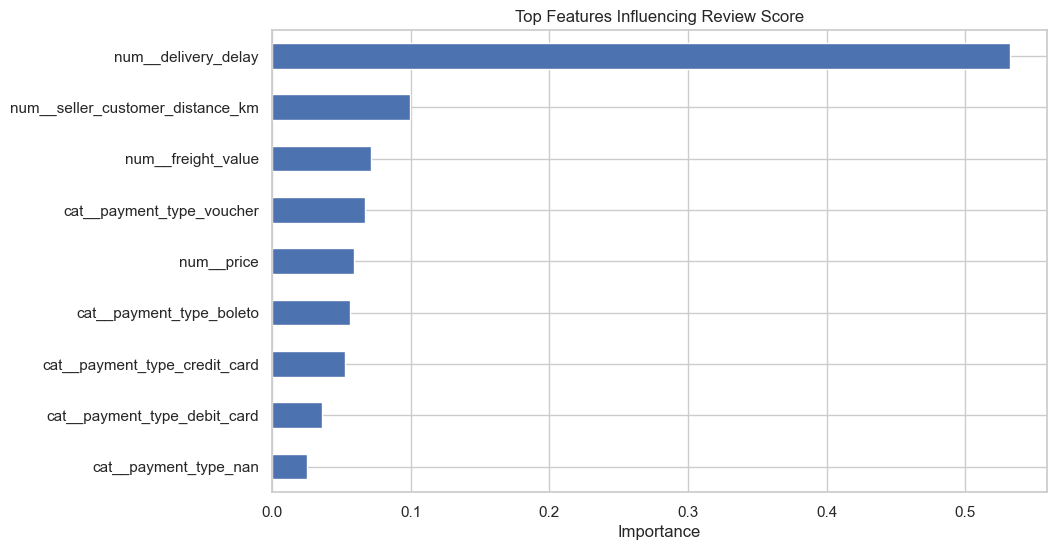

In [89]:
# Feature importance
import matplotlib.pyplot as plt

# Get feature names
feature_names = (
    model.named_steps['preprocessor']
    .get_feature_names_out()
)

# Get importance
importances = model.named_steps['model'].feature_importances_

# Plot
plt.figure(figsize=(10, 6))
pd.Series(importances, index=feature_names)\
  .sort_values(ascending=False)\
  .head(10)\
  .plot(kind='barh')

plt.title("Top Features Influencing Review Score")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.show()


> The feature importance plot shows that **delivery\_delay** and **seller_customer_distance** are the most influential drivers in the model, contributing significantly more to predictions than other variables. **freight_value and payment_type** has a comparatively smaller, though still meaningful, impact. This suggests that monetary factors play a dominant role in shaping the target outcome, while delivery performance provides additional explanatory power.


### 7. Customer Lifetime Value Prediction:
- Estimate CLV based on historical purchase and review data.

In [90]:
# merge orders_clean and order_items_clean datasets
clv_data = pd.merge(orders_clean[['order_id', 'customer_id', 'order_purchase_timestamp']],
                       order_items_clean[['order_id', 'price']],
                       on = 'order_id')

# merged with customer dataset to get the review_score
clv_data = clv_data.merge(order_reviews_clean[['order_id','review_score']], on='order_id', how='left')

# merged with customer dataset to get the customer_unique_id
clv_data = clv_data.merge(customers_clean[['customer_id','customer_unique_id']], on='customer_id', how='left')

# Display
clv_data.head(2)

,order_id,customer_id,order_purchase_timestamp,price,review_score,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:00,29.99,4.0,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:00,118.70,4.0,af07308b275d755c9edb36a90c618231


In [91]:
# Prepare data
clv_data['order_purchase_timestamp'] = pd.to_datetime(clv_data['order_purchase_timestamp'])

# Aggregate per customer
customer_clv = clv_data.groupby('customer_unique_id').agg(
    total_revenue=('price', 'sum'),
    num_orders=('order_id', 'nunique'),
    first_purchase=('order_purchase_timestamp', 'min'),
    last_purchase=('order_purchase_timestamp', 'max'),
    avg_review_score=('review_score', 'mean')
).reset_index()

# Preview
customer_clv.head()

,customer_unique_id,total_revenue,num_orders,first_purchase,last_purchase,avg_review_score
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,1,2018-05-10 10:56:00,2018-05-10 10:56:00,5.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,1,2018-05-07 11:11:00,2018-05-07 11:11:00,4.0
2,0000f46a3911fa3c0805444483337064,69.00,1,2017-03-10 21:05:00,2017-03-10 21:05:00,3.0
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,1,2017-10-12 20:29:00,2017-10-12 20:29:00,4.0
4,0004aac84e0df4da2b147fca70cf8255,180.00,1,2017-11-14 19:45:00,2017-11-14 19:45:00,5.0


In [92]:
# Calculate customer lifespan in years
customer_clv['customer_lifespan'] = (customer_clv['last_purchase'] - customer_clv['first_purchase']).dt.days / 365

# Avoid division by zero
customer_clv['customer_lifespan'] = customer_clv['customer_lifespan'].replace(0, 1/365)

# Average Order Value
customer_clv['avg_order_value'] = customer_clv['total_revenue'] / customer_clv['num_orders']

# Purchase Frequency = Orders per year
customer_clv['purchase_frequency'] = customer_clv['num_orders'] / customer_clv['customer_lifespan']

# Historical CLV per customer
customer_clv['clv'] = customer_clv['avg_order_value'] * customer_clv['purchase_frequency'] * customer_clv['customer_lifespan']


In [93]:
# adjust CLV by review satisfaction
customer_clv['normalized_review'] = (customer_clv['avg_review_score'] - 1) / 4
customer_clv['adjusted_clv'] = customer_clv['clv'] * customer_clv['normalized_review']

# View result
customer_clv[['customer_unique_id', 'clv', 'adjusted_clv']]


,customer_unique_id,clv,adjusted_clv
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,129.9000
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,14.1750
2,0000f46a3911fa3c0805444483337064,69.00,34.5000
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,19.4925
4,0004aac84e0df4da2b147fca70cf8255,180.00,180.0000
...,...,...,...
93337,fffcf5a5ff07b0908bd4e2dbc735a684,1570.00,1570.0000
93338,fffea47cd6d3cc0a88bd621562a9d061,64.89,48.6675
93339,ffff371b4d645b6ecea244b27531430a,89.90,89.9000
93340,ffff5962728ec6157033ef9805bacc48,115.00,115.0000


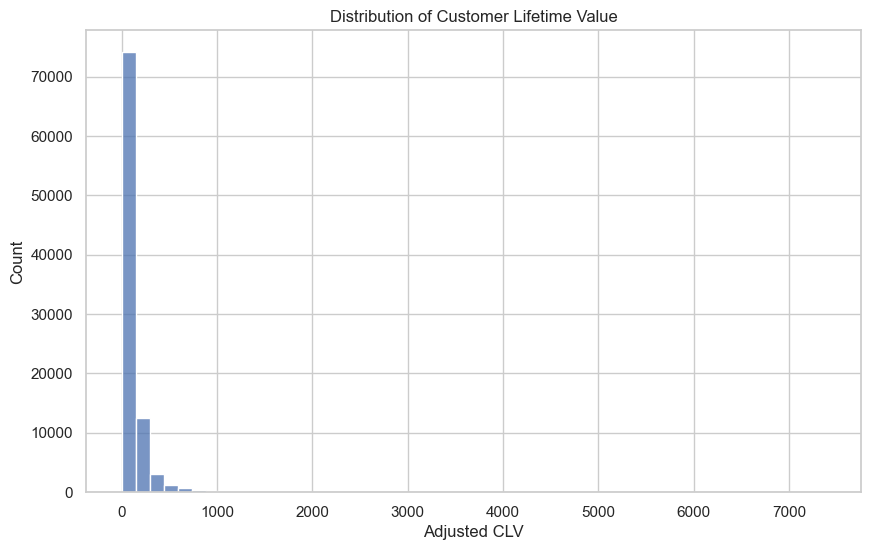

In [94]:
# Visualize CLV distribution
plt.figure(figsize=(10, 6))
sns.histplot(customer_clv['adjusted_clv'], bins=50)
plt.title('Distribution of Customer Lifetime Value')
plt.xlabel('Adjusted CLV')
plt.show()

> **Customer Lifetime Value (CLV) Distribution:**
> The distribution of adjusted CLV is highly right-skewed, with the majority of customers concentrated at lower CLV values and a long tail of high-value customers. This indicates that while most customers generate modest lifetime value, a small subset contributes disproportionately to overall revenue. Such skewness suggests opportunities for targeted retention and personalization strategies focused on high-CLV customers.

> ---

### 8. Churn Modeling:
- Identify customers likely to churn based on order frequency and satisfaction.

In [96]:
# Ensure datetime
orders_clean['order_purchase_timestamp'] = pd.to_datetime(
    orders_clean['order_purchase_timestamp']
)

# Reference date = last transaction date in dataset
reference_date = orders_clean['order_purchase_timestamp'].max()

# Map customer_unique_id
orders_cust = orders_clean.merge(
    customers_clean[['customer_id', 'customer_unique_id']],
    on='customer_id',
    how='left'
)

# Last purchase per customer
last_purchase = (
    orders_cust
    .groupby('customer_unique_id')['order_purchase_timestamp']
    .max()
    .reset_index()
)

# Days since last purchase
last_purchase['days_since_last_order'] = (
    reference_date - last_purchase['order_purchase_timestamp']
).dt.days

# Data-driven churn threshold (75th percentile)
churn_threshold = last_purchase['days_since_last_order'].quantile(0.75)

# Churn label
last_purchase['churn'] = (
    last_purchase['days_since_last_order'] > churn_threshold
).astype(int)

last_purchase.head(4)


,customer_unique_id,order_purchase_timestamp,days_since_last_order,churn
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:00,111,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:00,114,0
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:00,536,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:00,320,0


>We will now engineer order frequency + satisfaction features, which are the core drivers of churn

In [97]:
# -------Order Frequency------
order_features = (
    orders_cust
    .groupby('customer_unique_id')
    .agg(
        total_orders=('order_id', 'nunique'),
        first_order=('order_purchase_timestamp', 'min'),
        last_order=('order_purchase_timestamp', 'max')
    )
    .reset_index()
)

# Customer lifetime
order_features['customer_lifetime_days'] = (
    order_features['last_order'] - order_features['first_order']
).dt.days + 1

# Avoid inflated frequency for new users
order_features['customer_lifetime_days_adj'] = (
    order_features['customer_lifetime_days'].clip(lower=30)
)

# Orders per month
order_features['orders_per_month'] = (
    order_features['total_orders'] /
    (order_features['customer_lifetime_days_adj'] / 30)
)

order_features = order_features[
    ['customer_unique_id', 'total_orders', 'orders_per_month']
]

order_features.head()


,customer_unique_id,total_orders,orders_per_month
0,0000366f3b9a7992bf8c76cfdf3221e2,1,1.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,1.0
2,0000f46a3911fa3c0805444483337064,1,1.0
3,0000f6ccb0745a6a4b88665a16c9f078,1,1.0
4,0004aac84e0df4da2b147fca70cf8255,1,1.0


In [98]:
# Satisfaction feature (review)
reviews_cust = (
    order_reviews_clean
    .merge(
        orders_clean[['order_id', 'customer_id']],
        on='order_id',
        how='left'
    )
    .merge(
        customers_clean[['customer_id', 'customer_unique_id']],
        on='customer_id',
        how='left'
    )
)

review_features = (
    reviews_cust
    .groupby('customer_unique_id')
    .agg(
        avg_review_score=('review_score', 'mean'),
        low_rating_pct=('review_score', lambda x: (x <= 2).mean())
    )
    .reset_index()
)

review_features.head()


,customer_unique_id,avg_review_score,low_rating_pct
0,0000366f3b9a7992bf8c76cfdf3221e2,5.0,0.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4.0,0.0
2,0000f46a3911fa3c0805444483337064,3.0,0.0
3,0000f6ccb0745a6a4b88665a16c9f078,4.0,0.0
4,0004aac84e0df4da2b147fca70cf8255,5.0,0.0


In [99]:
# Combine the datasets

# Merge features + churn label
churn_df = (
    last_purchase[['customer_unique_id', 'churn']]
    .merge(order_features, on='customer_unique_id', how='left')
    .merge(review_features, on='customer_unique_id', how='left')
)

# Handle customers with no reviews
churn_df[['avg_review_score', 'low_rating_pct']] = (
    churn_df[['avg_review_score', 'low_rating_pct']]
    .fillna(3)
)

churn_df.dropna(inplace=True)

churn_df.sample(5)


,customer_unique_id,churn,total_orders,orders_per_month,avg_review_score,low_rating_pct
8475,16f2c763fb39cef72b929170a8ba7527,0,1,1.0,5.0,0.0
18556,32bd7fa6d305e3c9a073ec9f2c5a49ad,1,1,1.0,3.0,0.0
16814,2df79c0c80c225d537833abb01a1a8ca,1,1,1.0,5.0,0.0
72572,c6dd8fabb5c20145411c78830d5031ba,1,1,1.0,3.0,0.0
82657,e2596b02ca173fc272e2ce2c42ac12af,0,1,1.0,5.0,0.0


In [100]:
churn_df['churn'].value_counts()

churn
0    70040
1    23302
Name: count, dtype: int64

### **`Model Building`**

In [101]:
# Feature selection
X = churn_df[
    [
        'total_orders',
        'orders_per_month',
        'avg_review_score',
        'low_rating_pct'
    ]
]

# target
y = churn_df['churn']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [102]:
# Handle class imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()


In [103]:
# Train XGBoost Model
xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [104]:
# Model evaluation
# Predictions
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

# Metrics
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


              precision    recall  f1-score   support

           0       0.80      0.14      0.24     14008
           1       0.26      0.89      0.40      4661

    accuracy                           0.33     18669
   macro avg       0.53      0.52      0.32     18669
weighted avg       0.67      0.33      0.28     18669

ROC-AUC: 0.5200411041056503


>The model demonstrates a **strong ability to identify churned customers**, achieving a high recall of **0.89 for the churn class**, which indicates that most customers who churn are correctly flagged. This makes the model effective as an **early-warning system** for churn risk.

>However, the model shows **low precision and overall accuracy**, driven by a high number of false positives. This indicates that while the model captures most churn cases, it also incorrectly classifies many active customers as churn risks.

>The ROC-AUC score of **0.52** suggests that the model’s overall discriminatory power is only slightly better than random, highlighting the need for further feature refinement, threshold tuning, or additional behavioral signals to improve performance.

---


In [105]:
# Identify high risk customers
churn_df['churn_probability'] = xgb_model.predict_proba(X)[:, 1]

high_risk_customers = churn_df[
    churn_df['churn_probability'] > 0.7
].sort_values('churn_probability', ascending=False)

high_risk_customers.head()


,customer_unique_id,churn,total_orders,orders_per_month,avg_review_score,low_rating_pct,churn_probability
82974,e3301490c373db9263c15a73172d0c6f,1,3,3.000000,4.250000,0.250000,0.896778
52760,90f323e9f0948ddd96c6f6a8ecc75830,1,3,1.097561,3.250000,0.000000,0.880283
92732,fe59d5878cd80080edbd29b5a0a4e1cf,1,3,1.184211,3.333333,0.333333,0.869864
70989,c25d2fb6d22e04ce43c3652e3cacadad,1,3,2.045455,3.666667,0.333333,0.869081
73952,ca994abc57b0bd7981d91d0061b3d8d6,1,3,2.307692,2.800000,0.400000,0.852436


In [111]:
# Feature importance
import pandas as pd

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb_model.feature_importances_
}).sort_values(by='importance', ascending=False)

feature_importance


,feature,importance
1,orders_per_month,0.477967
2,avg_review_score,0.216945
3,low_rating_pct,0.163041
0,total_orders,0.142047


>The feature importance results indicate that **order frequency and customer satisfaction are the primary drivers of churn**.
`orders_per_month` is the most influential feature, accounting for nearly half of the model’s predictive power, which suggests that customers with declining or low purchase frequency are significantly more likely to churn.

>Customer satisfaction also plays a critical role: both `avg_review_score` and `low_rating_pct` show strong influence, indicating that negative customer experiences materially increase churn risk.

>While `total_orders` contributes to the model, its lower importance suggests that **recent engagement intensity is more predictive of churn than historical purchase volume**.

---


### `9. Lead Conversion Modeling:`
- Predict the likelihood of an MQL converting to a closed deal using behavioral and sales funnel features.

In [136]:
# # Merge leads datasets
leads = qualified_leads_clean.merge(
    closed_leads_clean[['mql_id', 'won_date']],
    on='mql_id',
    how='left'
)

leads['converted'] = leads['won_date'].notnull().astype(int)


In [137]:
# Feature engineering
leads['first_contact_date'] = pd.to_datetime(leads['first_contact_date'])
reference_date = leads['first_contact_date'].max()

leads['lead_age_days'] = (
    reference_date - leads['first_contact_date']
).dt.days


In [138]:
# Feature selection
features = [
    'origin',
    'landing_page_id',
    'lead_age_days'
]

X = leads[features].fillna('Unknown')
y = leads['converted']

X_encoded = pd.get_dummies(X, drop_first=True)


In [139]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

model = XGBClassifier(
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss',
    random_state=42
)

model.fit(X_train, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [140]:
# Model evaluation
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       0.95      0.64      0.76      1426
           1       0.18      0.72      0.29       162

    accuracy                           0.65      1588
   macro avg       0.57      0.68      0.53      1588
weighted avg       0.87      0.65      0.72      1588

ROC-AUC: 0.729596298027808


The lead conversion model demonstrates a **moderate ability to distinguish between converting and non-converting leads**, with an ROC-AUC of **0.73**, indicating reasonable discriminatory power.

Looking at class-specific performance:

* For **non-converted leads (class 0)**, the model achieves high precision (**0.95**) and moderate recall (**0.64**), meaning most predicted non-conversions are correct, but some actual non-conversions are missed.
* For **converted leads (class 1)**, recall is relatively high (**0.72**) but precision is low (**0.18**), indicating the model captures many true conversions but also generates a number of false positives.

Overall, the model is **useful for identifying potential conversions** (early lead scoring) but would benefit from **further feature enrichment or threshold tuning** to improve precision for converted leads.
rsion process.

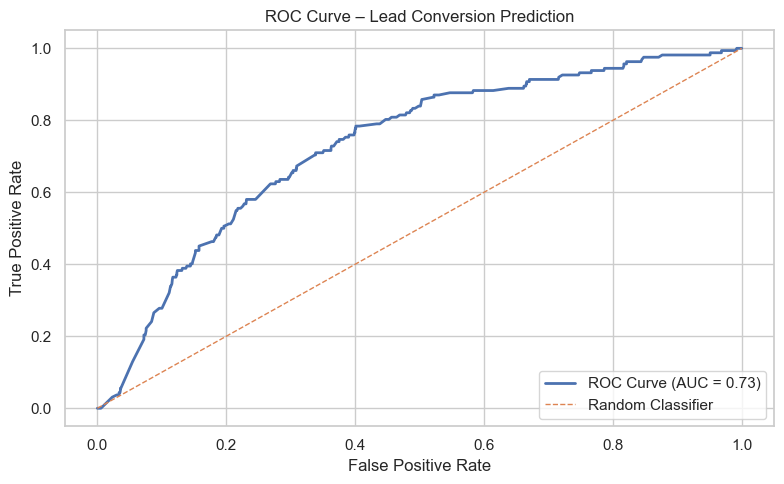

In [141]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(8, 5))
plt.plot(
    fpr,
    tpr,
    linewidth=2,
    label=f'ROC Curve (AUC = {auc_score:.2f})'
)
plt.plot(
    [0, 1],
    [0, 1],
    linestyle='--',
    linewidth=1,
    label='Random Classifier'
)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Lead Conversion Prediction')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


The ROC curve illustrates the model’s ability to distinguish between converting and non-converting leads at various classification thresholds.

* The **blue curve** represents the lead conversion model, while the **orange dashed line** represents a random classifier.
* The model’s **AUC of 0.73** indicates it performs significantly better than random guessing and has a reasonable capacity to rank leads by their likelihood of conversion.
* The curve’s upward trajectory toward the top-left corner shows that the model can achieve a relatively high true positive rate while keeping the false positive rate moderate, which is useful for prioritizing leads in a sales pipeline.

---

### **Key Results and Findings**

1. **Delivery Performance Strongly Drives Customer Satisfaction**

   * There is a **moderate negative Pearson correlation (~ −0.27)** between delivery delay and review scores, indicating that as delivery delays increase, customer satisfaction consistently declines.
   * The **Chi-Squared test (p < 0.001)** confirms a statistically significant dependency between delivery timeliness and review sentiment.
   * Late deliveries are disproportionately associated with negative reviews, while early/on-time deliveries correlate with positive or neutral sentiment.

2. **Geography and Distance Contribute to Delivery Delays**

   * Average seller–customer distance varies substantially by state and city, with **longer distances associated with higher delivery delays**.
   * Certain states and cities repeatedly appear among those with the **highest average delays**, indicating structural logistics inefficiencies rather than random variation.

3. **Revenue and Operational Impact of Delays**

   * Orders delivered late tend to generate **lower review scores**, which can negatively impact repeat purchases, brand trust, and long-term revenue.
   * Freight cost and seller–customer distance emerged as important features in delay prediction models, highlighting logistics cost–time trade-offs.

4. **Lead Qualification Does Convert to Revenue, but Unevenly**

   * Qualified leads do convert to closed deals, but **conversion rates vary significantly by origin, business segment, and behavioral profile**.
   * Some lead sources show near-100% conversion but represent small volumes, while high-volume sources show weaker efficiency—indicating optimization opportunities rather than acquisition issues.

5. **Predictive Models Reveal Weak but Directional Signals**

   * Delivery delay prediction models show **low R² scores (~0.07–0.11)**, meaning much variance remains unexplained, but:

     * Distance, freight value, approval time, and shipping start time consistently influence outcomes.
   * Review score prediction models confirm that **delivery delay is the most influential driver**, outweighing price and freight value.

---


### **Actionable Recommendations**

#### **1. Logistics & Delivery Optimization**

* **Introduce distance-aware fulfillment rules**:
  Prioritize assigning nearby sellers or regional warehouses for long-distance orders to reduce delay risk.
* **Target high-delay states and cities** with localized logistics interventions (carrier partnerships, micro-fulfillment hubs, SLA renegotiation).
* **Set internal alert thresholds** (e.g., approval or shipping start > 24 hours) to proactively flag high-risk orders.

#### **2. Customer Experience Improvements**

* **Proactively communicate delays** for at-risk orders to reduce negative sentiment when delays are unavoidable.
* **Offer compensation or incentives** (discounts, free shipping) automatically for late deliveries to protect review scores.

#### **3. Funnel & Lead Optimization (A/B Testing Opportunities)**

* **A/B test lead qualification rules**:

  * Compare stricter vs. broader MQL definitions to improve conversion efficiency.
* **Test channel-specific messaging**:

  * High-conversion but low-volume channels → scale acquisition.
  * High-volume but low-conversion channels → refine messaging or targeting.
* **Experiment with follow-up timing and cadence** by behavioral profile to increase close rates.

#### **4. Product & Pricing Strategy**

* For products with **high freight cost and long delivery times**, test:

  * Bundled shipping discounts
  * Price adjustments vs. faster delivery options
* A/B test **“fast delivery” badges** on product pages to measure impact on conversion and review scores.

#### **5. Data & Modeling Enhancements**

* Improve predictive performance by incorporating:

  * Carrier-level data
  * Warehouse location data
  * Historical seller reliability metrics
* Transition delay prediction from pure regression to a **risk-classification approach** (e.g., “High risk of late delivery”) for better operational decision-making.

### **Executive Takeaway**

Delivery performance is a **critical lever** affecting customer satisfaction, reviews, and long-term revenue. While current predictive models provide directional insight, the **largest immediate gains will come from operational fixes, targeted A/B testing, and logistics optimization**, rather than more complex modeling alone. This positions the business to improve customer experience, conversion efficiency, and profitability simultaneously.

---